<a href="https://colab.research.google.com/github/Noxscamp/CoderHouse/blob/main/Desafio_FeatureSelection%2BLeandro_Marin%2BLeonel_Colloca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # ***Video Game Sales*** 🎮

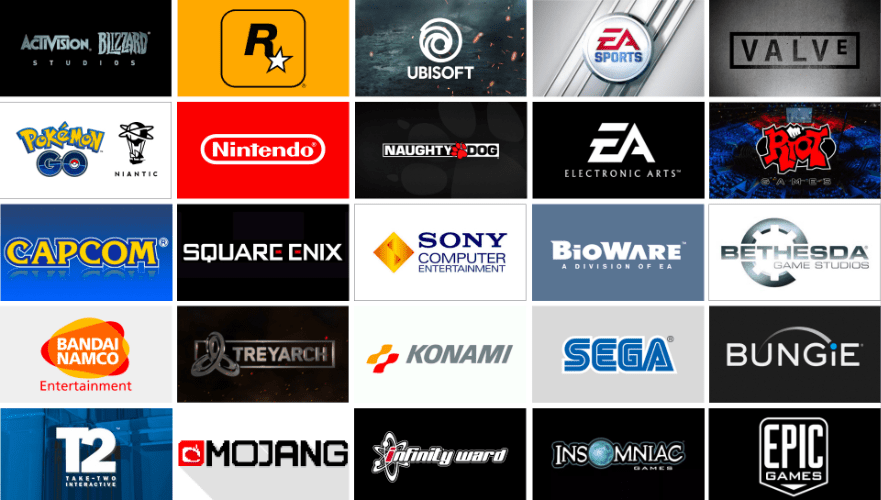




# ***Business Understading.***

## Definición del objetivo
Con los datos históricos que se posee acerca de los videojuegos, géneros, plataformas y ventas, buscamos obtener indicios que demuestren qué tipos de plataformas serán las más utilizadas a futuro y qué genero tendrá mayor relevancia permitiendo desarrollar nueva información sobre futuras ventas.
## Contexto comercial
Debido al constante cambio tecnologico que vivimos, se ha producido un enorme desarrollo en los videojuegos, los cuales están próximos a simular nuestra realidad, lo cual nos benificiaría a la hora de tomar desiciones, realizar ensayos o pruebas en dispositivos, entrenar a un piloto o una IA, diseñar y modificar estructuras previo a fabricarlas, etc permitiendo ahorrar costos y tiempo. Es por eso que las empresas más importantes del mundo están en la búsqueda de tecnologías como plataformas de videojuegos y simuladores que les permitan encontrar nuevas soluciones a sus servicios de forma más inmersiva.
## Problema comercial
Se pretende contar con un modelo predictivo que ayude a tomar las desiciones correctas sobre el futuro de las plataformas y géneros más relevantes de videojuegos.
## Contexto analítico
*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: Año en la cual el juego se lanzó.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en Estados Unidos (Millones)


*   EU_Sales: Ventas en Europa (Millones)


*   JP_Sales: Ventas en Japon (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


# ***Data Understading.***

## ***Data Adquisition***

Llamo a las librerias potenciales a utilizar.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [2]:
url='https://raw.githubusercontent.com/Noxscamp/CoderHouse/main/Datasets/vgsales.csv'
resp_vgsales=requests.get(url)
print(resp_vgsales)

<Response [200]>


In [3]:
vgsales = pd.read_csv(url)

In [4]:
df = pd.DataFrame(vgsales)
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [5]:
df.shape

(16598, 11)

### ***Serie de preguntas***

*   ¿Cuál fue la relación entre las ventas en Estados Unidos y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Europa y el resto del mundo? 
*   ¿Cuál fue la relación entre las ventas en Japón y el resto del mundo? 
*   ¿Cuáles son los juegos mas vendidos?
*   ¿Cuáles son los generos mas vendidos? 
*   ¿Cuál fue el formato de consola más utilizado?
*   ¿Cuál fue el desarrollador que obtuvo más ventas? 
*   ¿Cuál fue la evolución entre las plataformas a lo largo de los años? 

# ***Data Preparation.***

## ***EDA - Exploratory Data Analysis 📊***

### ***1) Data Wrangling***

Comenzamos realizando la **preparación de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

####Borrado de duplicados

In [6]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


####Análisis de nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Matris de valores perdidos')

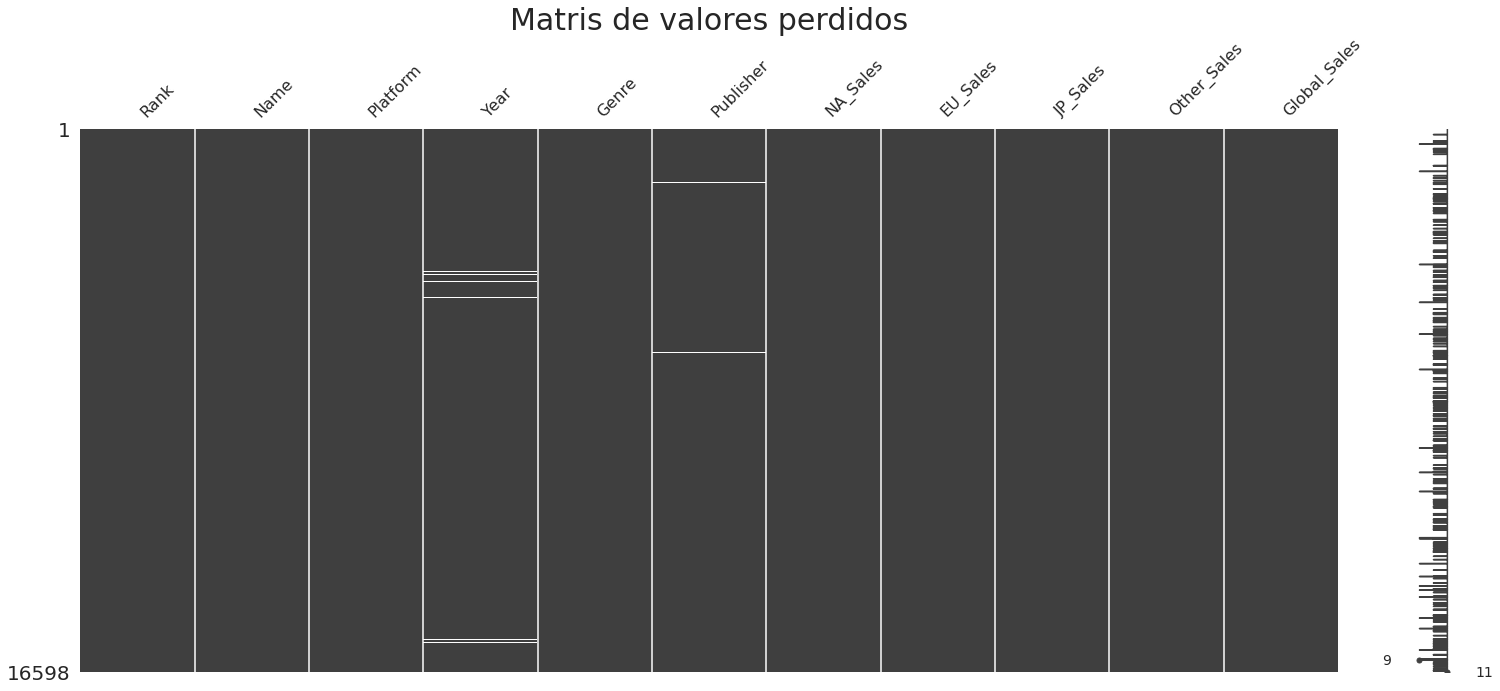

In [8]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

Podemos observar rápidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

Columnas  Porcentaje_Missing
Year                  Year            1.632727
Publisher        Publisher            0.349440
Rank                  Rank            0.000000
Name                  Name            0.000000
Platform          Platform            0.000000
Genre                Genre            0.000000
NA_Sales          NA_Sales            0.000000
EU_Sales          EU_Sales            0.000000
JP_Sales          JP_Sales            0.000000
Other_Sales    Other_Sales            0.000000
Global_Sales  Global_Sales            0.000000

<Figure size 1080x360 with 0 Axes>

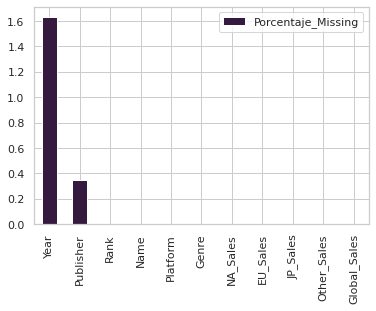

In [11]:
plt.figure(figsize=(15,5))
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "Year" con el 1,6% de los mismos, miertras que en la variable "Publisher" apenas alcanza 0,35% de datos nulos. Por lo tanto, concluimos que los datos nulos no tienen relevancia alguna para nuestro análisis.

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con los datos nulos:

In [12]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Decisión: Al tener muchos datos relevantes, solo eliminaremos aquellos datos que estén vacios.

In [13]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Decisión: Aplicar alguna técnica de reemplazo por 'Desconocido'

####Llenar con la catergoría "Desconocido"

In [14]:
col_cat=['Publisher'] #Columnas categóricas

#reemplazar con "Desconocido" en las columnas que estén vacias
for i in col_cat:
  df[i] = df[i].fillna('Desconocido')

df['Publisher'].value_counts().sum()

16598

In [15]:
df.shape

(16598, 11)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".

####Borrado de filas con datos nulos

In [16]:
df = df.dropna(axis=0)

In [17]:
df['Year'].isnull().sum()

0

Podemos observar que ya no hay datos nulos en ambas variables numericas.

####Transformo el tipo de dato de las columnas

Debido a que trabajaremos con años, podemos utilizar variables enteras y no floats.

In [18]:
df["Year"] = df["Year"].astype(int)

####Verifico las transformaciones realizadas en el dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


### ***2) Distribución de datos***

Continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis.

In [20]:
df['Year'].describe()

count    16327.000000
mean      2006.406443
std          5.828981
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

Text(0.5, 1.0, 'Boxplot')

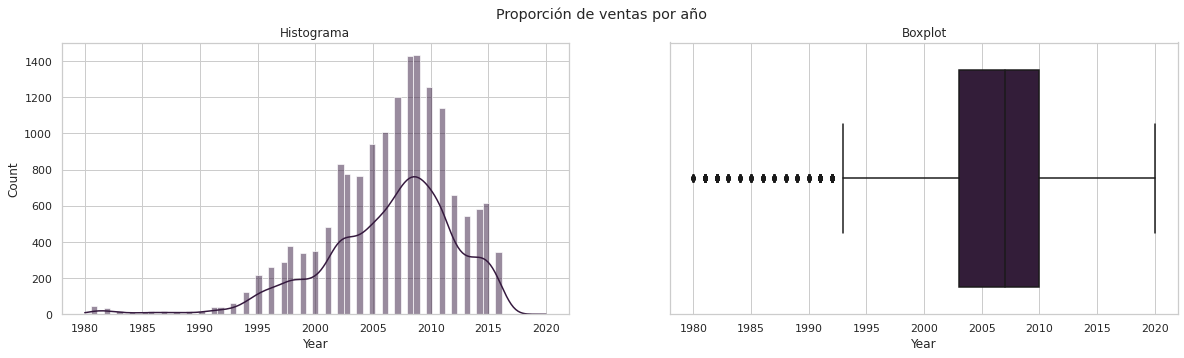

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Proporción de ventas por año')

# Histograma
sns.histplot(ax=axes[0], x = df['Year'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = df['Year'])
axes[1].set_title("Boxplot")


Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los años, sin embargo, también se logra identificar una caída en las ventas después del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

Podemos observar también que tenemos presencia de outliers en los datos pasados, por lo que es necesario realizar un análisis para determinar si dichos datos tendrán un impacto negativo en la obtensión de insights y deberían eliminarse.

### ***3) Correlaciones y dependencias***

**A) Variables Numericas**

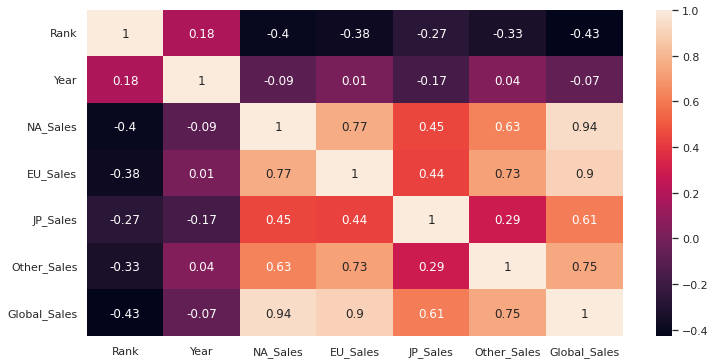

In [22]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

Las ventas en Estados Unidos, Europa y Japón influyen de manera significante en el resto del mundo, con una correlación de 0.94, 0.90 y 0.61 respectivamente.

Sin embargo, no existe una gran correlación entre las ventas propias de Estados Unidos y Europa con respecto a Japón, seguramente porque los usuarios consumen distintos géneros o plataformas en esas regiones, obteniendo una correlación de 0.45 y 0.44. 

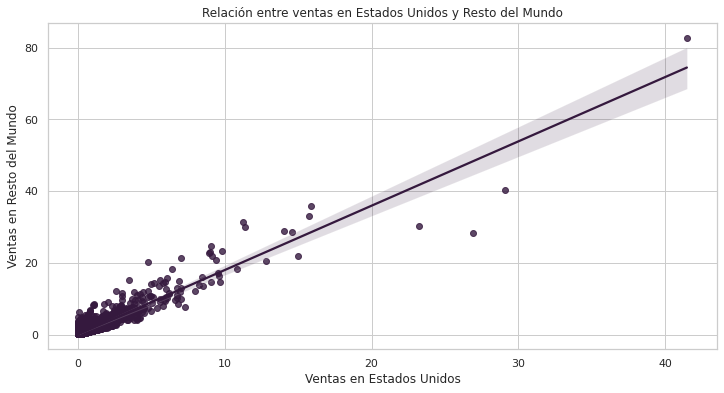

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Estados Unidos y Resto del Mundo')
plt.show()

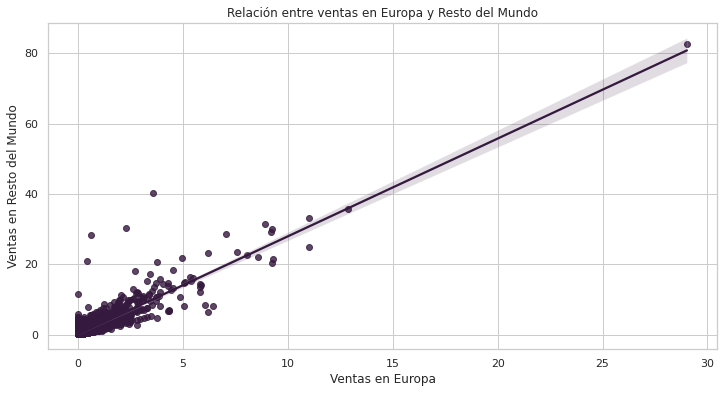

In [24]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Europa y Resto del Mundo')
plt.show()

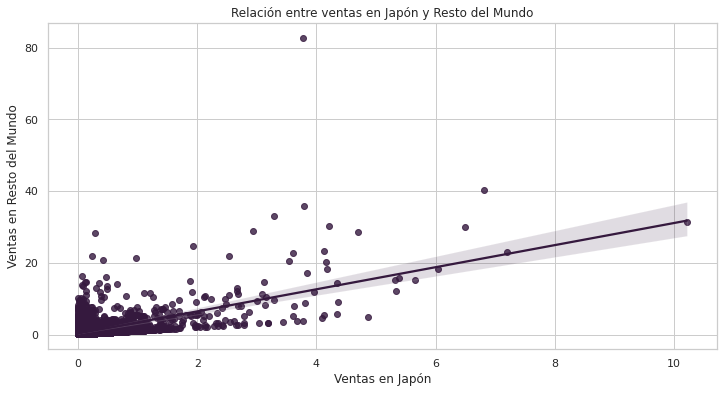

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Japón')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relación entre ventas en Japón y Resto del Mundo')
plt.show()

Como podemos observar, existe una relación lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Japón, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones de mayor consumo, también crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un género, plataforma o desarrollador tiene éxito, tiene un alcance a todo el mundo y no sólo a una región.

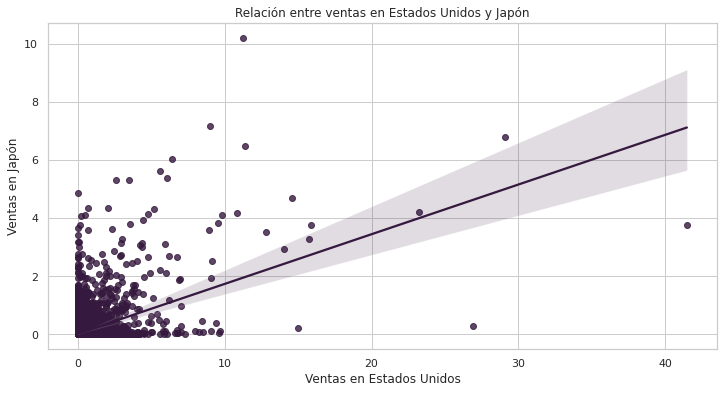

In [26]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Estados Unidos')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Estados Unidos y Japón')
plt.show()

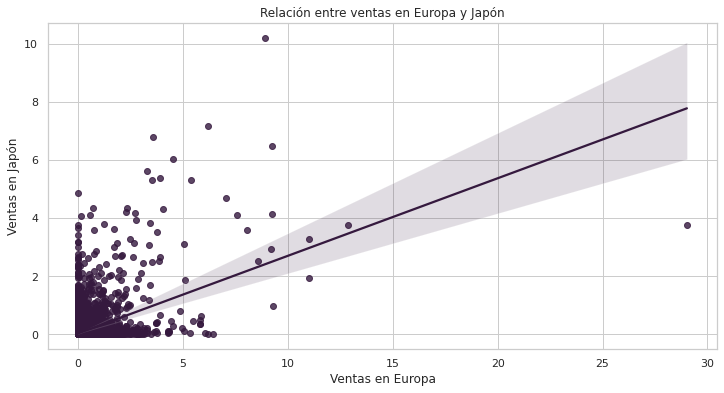

In [27]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Japón')
plt.title('Relación entre ventas en Europa y Japón')
plt.show()

Pero si observamos la relación entre las ventas en Estados Unidos y Japón, y las ventas entre Europa y Japón podemos notar una menor correlación, seguramente por las diferentes culturas y consumo, donde Estados Unidos y Europa con respecto a Japón tienen inclinación a distintos géneros y plataformas.

Más adelante podremos graficar y observar qué géneros y plataformas son las que más se consumen en cada región.

**B) Variables categoricas**

In [28]:
T_contingencia = pd.crosstab(df.Platform, df.Genre)
T_contingencia

Genre     Action  Adventure  Fighting  Misc  Platform  Puzzle  Racing  \
Platform                                                                
2600          55          1         1     5         9       8       4   
3DO            0          1         0     0         0       1       0   
3DS          180         36        14    53        28      20      10   
DC             3         11        12     0         2       0       6   
DS           336        238        36   389        90     236      66   
GB             6          5         0     8        18      15       2   
GBA          162         37        23   110       139      39      64   
GC            98         20        42    35        73      12      60   
GEN            3          2         5     1         7       0       1   
GG             0          0         0     0         1       0       0   
N64           37          4        29    18        30      12      57   
NES           13          1         4     2        28      14       4   
NG             0          0        11     0         0       0       0   
PC           161         65         5    22        11      25      57   
PCFX           0          0         0     0         0       0       0   
PS           154         67       108    76        64      32     144   
PS2          345        196       146   218       101      18     212   
PS3          373         72        76   121        36       2      90   
PS4          122         19        17    15        11       1      17   
PSP          217        213        73   104        36      44      65   
PSV          142         86        16    24        10       3      11   
SAT            3         26        31    15         5       5       8   
SCD            0          0         0     2         1       0       1   
SNES          12          4        25    17        26      13       9   
TG16           0          1         0     0         0       0       0   
WS             0          0         0     0         0       0       0   
Wii          230         83        41   272        57      54      92   
WiiU          63          3         5    21        16       4       3   
X360         318         47        65   122        24       6     102   
XB           152         26        44    45        49       7     122   
XOne          68         12         7    15         4       0      19   

Genre     Role-Playing  Shooter  Simulation  Sports  Strategy  
Platform                                                       
2600                 0       22           1      10         0  
3DO                  0        0           1       0         0  
3DS                 85        6          28      25        15  
DC                   4        3           1      10         0  
DS                 196       42         280     146        78  
GB                  21        1           5       9         7  
GBA                 73       40          18      88        18  
GC                  25       48          12     106        11  
GEN                  3        1           0       3         1  
GG                   0        0           0       0         0  
N64                  7       24          10      79         9  
NES                 11        7           0      14         0  
NG                   0        0           0       1         0  
PC                 103      145         115      49       185  
PCFX                 1        0           0       0         0  
PS                  97       96          60     221        70  
PS2                183      158          89     391        70  
PS3                117      155          30     210        22  
PS4                 47       34           5      43         5  
PSP                191       37          29     130        58  
PSV                 82        5           3      23         7  
SAT                 17       22           7      16        18  
SCD                  1        0           0       0   

In [29]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
import pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 28.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 16.3 MB/s eta 0:00:00
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328711 sha256=fca3635c288b6304f79cacc8d286a02f563db56c8812778984c45c63ea7aee7b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ghhqk28q/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=

In [30]:
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Los gráficos de correlación anteriores nos pueden dar una idea de que existe una gran similitud en cuanto a ventas en el mercado Americano y el Europeo, sin embargo, el mercado Japones presenta poca relación con respecto a los anteriores, tal como se mencionó, posiblente por la diferencia cultural lo que conlleva a un consumo de plataformas y géneros distintos que Estados Unidos y Europa.

También notamos en el gráfico del Coeficiente de Phi una buena correlación entre las ventas de plataformas y el paso de los años, seguramente por el avance de las mismas y el consumo masivo que fueron teniendo. Con respecto al género de los juegos no se visualiza una gran correlación con otras características del dataset.

### ***4) Análisis Estadístico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

####Análisis descriptivo e inferencial univariado

#####Feature: "Platform"

Proporción de plataformas vendidas:

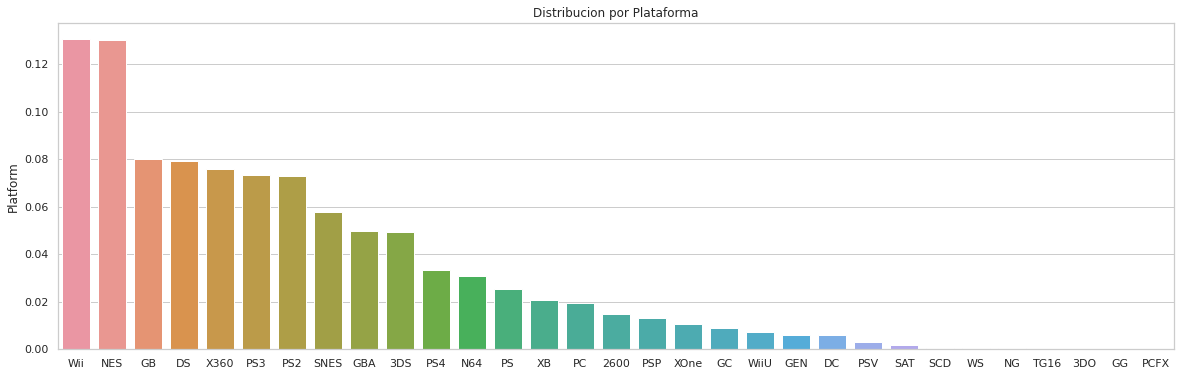

In [31]:
plt.figure(figsize=(20, 6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Se puede observar que las plataformas con un porcentaje considerable de ventas a lo largo de la historia fueron aquellas desarrolladas por Nintendo, como la  Nintendo Wii, la Nintendo NES, la GameBoy, la Nintendo DS, seguidas por la XBox 360 desarrollada por Microsoft y las conocidas Playstation 3 y 2 desarrolladas por Sony. 

Podemos notar que la Playstation 4  y la XBox One no presentan un gran porcentaje de ventas comparado con sus antecesores, sin embargo, en llamativo como la Nintendo NES se ha mantenido como un éxito de ventas desde su salida en 1985.

Nintendo NES:

![nintendo](https://media.istockphoto.com/id/458077055/es/foto/nintendo-sistema-de-entretenimiento-con-controlador-y-juego.jpg?s=612x612&w=0&k=20&c=AbKDu6BeiMiWYJPh6sP66aI1ywDQb_k0K9iDh45nNpk=)


#####Feature: "Genre"

Proporción de géneros vendidos:

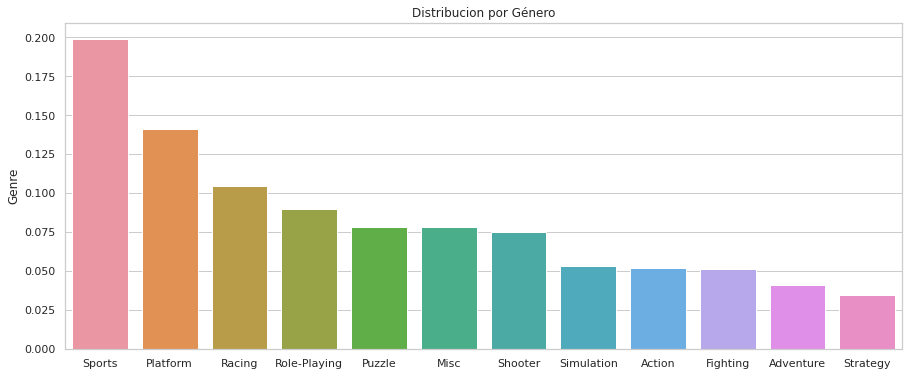

In [32]:
plt.figure(figsize=(15, 6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Género')
plt.show()

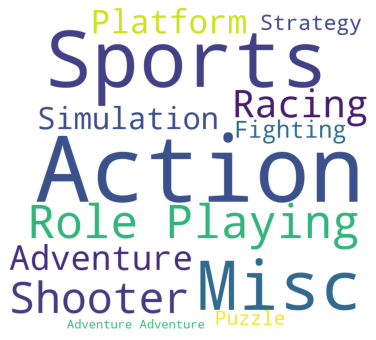

In [33]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Por un lado se puede observar que el género más consumido es el de Deportes alcanzando casi el 20% del mercado, mientras lo siguen los juegos de Plataformas, Carreras y Role-Playing, y en menor medida Puzzle, Shooter, Acción, seguidos para nuestra sorpresa por Sports, Strategy, Adventure, Acción y Estrategia.

Cabe destacar la WordCloud anterior donde se puede indentificar que existe una importante cantidad de juegos de Acción ofrecida en el mercado, sin embargo, apenas logra abarcar el 5% de las ventas.

#####Feature: "Publisher"

Proporción de desarrolladores con más ventas:

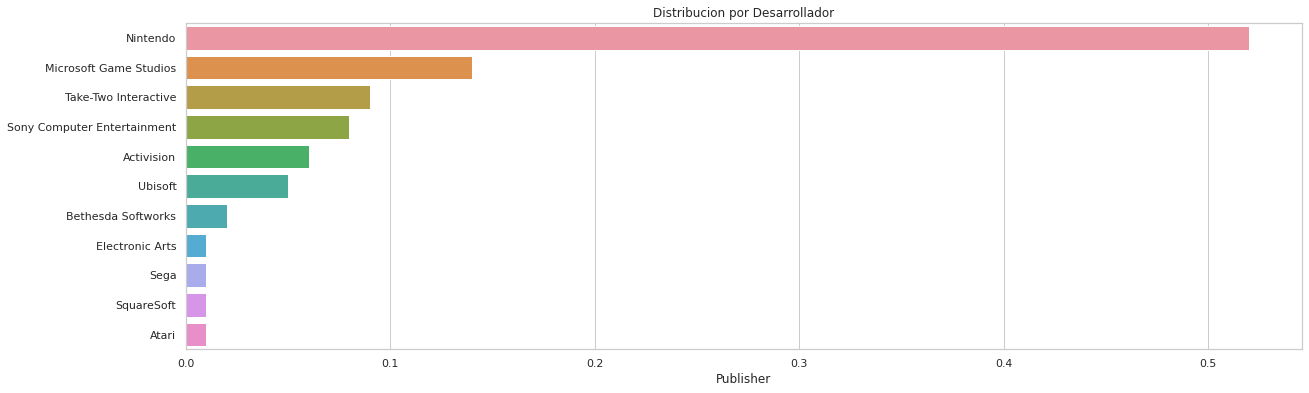

In [34]:
plt.figure(figsize=(20, 6))
x=df.head(100)["Publisher"].unique()
y=df.head(100)["Publisher"].value_counts()/df.head(100)["Publisher"].value_counts().sum()
ax=sns.barplot(x=y, y=x)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que el desarrollador que más juegos ha vendido a lo largo de la historia fue Nintendo (Así como también comprobamos anteriormente que es el que más plataformas ha ofrecido) con casi el 50% del mercado, seguido de Microsoft Game Studios con el 15% de las ventas, y en menor porcentaje los nuevos desarrolladores de juegos como Activision, Ubisoft y Electronic Arts.

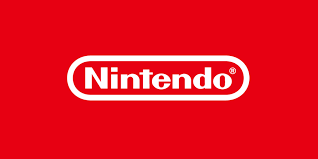







#####Evolución de las plataformas en el tiempo

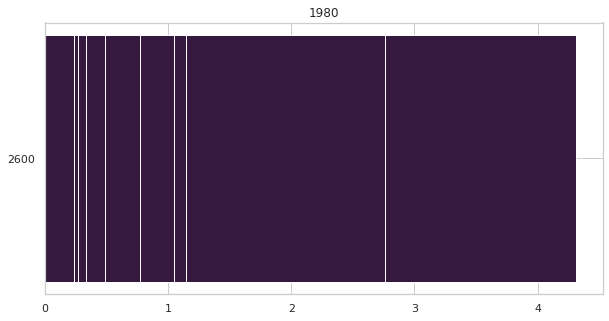

In [35]:
from matplotlib import animation
years = df.sort_values("Year")['Year'].unique()

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = df.loc[df['Year'] == year, :]
  ax.clear() #cada vez que haya una iteracion se limpiará el grafico
  ax.barh(data_temp.Platform,data_temp.Global_Sales)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) 

In [36]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

####Análisis descriptivo e inferencial bivariado

#####RECORD DE VENTAS POR REGIÓN:

######ESTADOS UNIDOS:

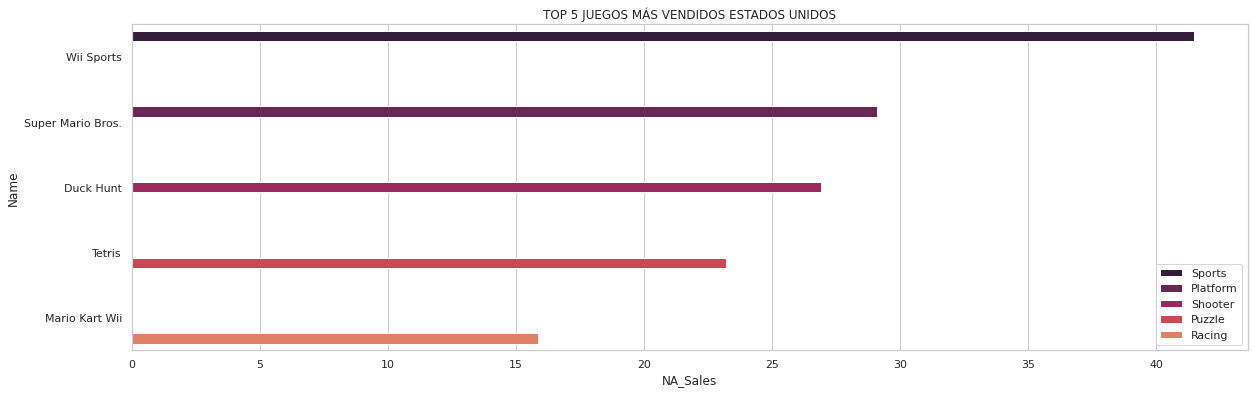

In [37]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='NA_Sales',hue='Genre',data=df.sort_values('NA_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

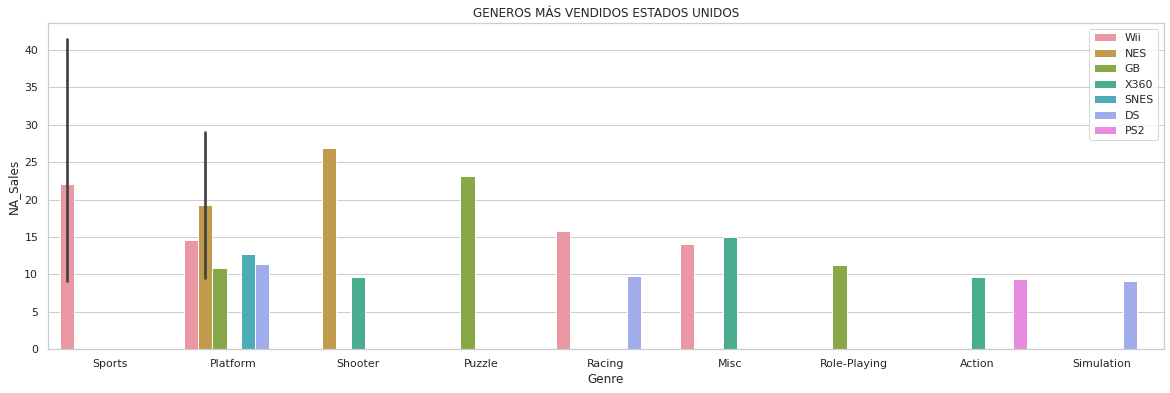

In [38]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

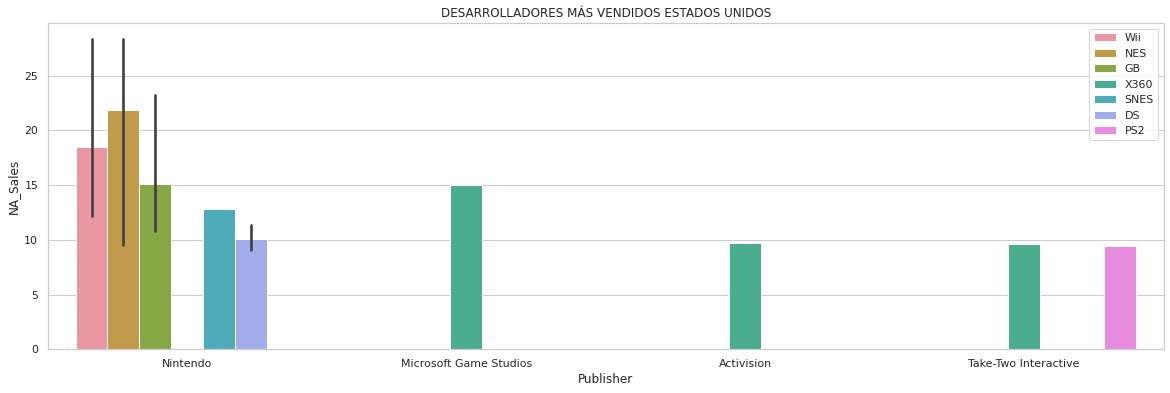

In [39]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

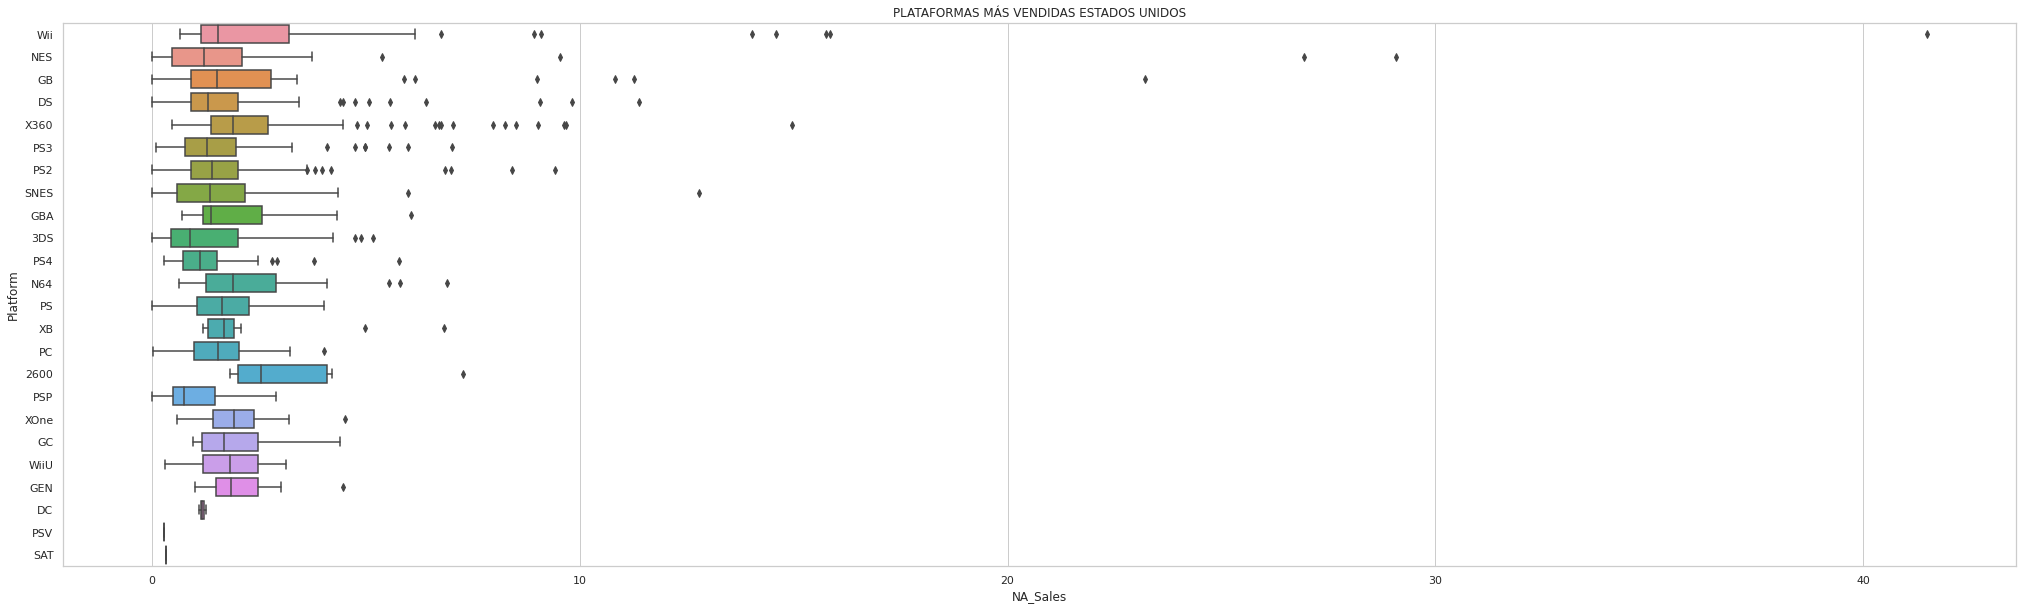

In [40]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'NA_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS UNIDOS')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Estados Unidos se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con más de 40 millones en ventas.

También podemos observar que los americanos han tenido un consumo preferente por juegos y consolas de Nintendo, seguido de desarrollos propios del país producidos por Microsoft Games y Activision, acompañados por plataformas como XBox. 

Finalmente vemos que en Estados Unidos existe un consumo de juegos de género muy variado, liderando las ventas los juegos de Deporte, Plataforma y Shooter, que inclusive se ofertan para distintas consolas.

Es interesante ver que en Estados Unidos lideran los juegos y consolas japoneses, y cómo los juegos de deporte y disparos tienen gran relevancia.

######JAPÓN:

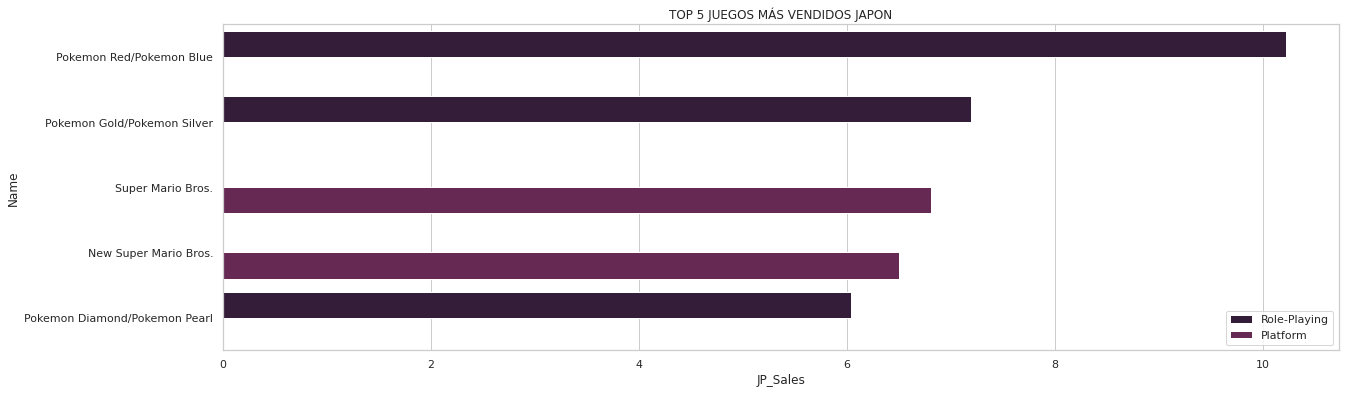

In [41]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='JP_Sales',hue='Genre',data=df.sort_values('JP_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS JAPON')
plt.legend()

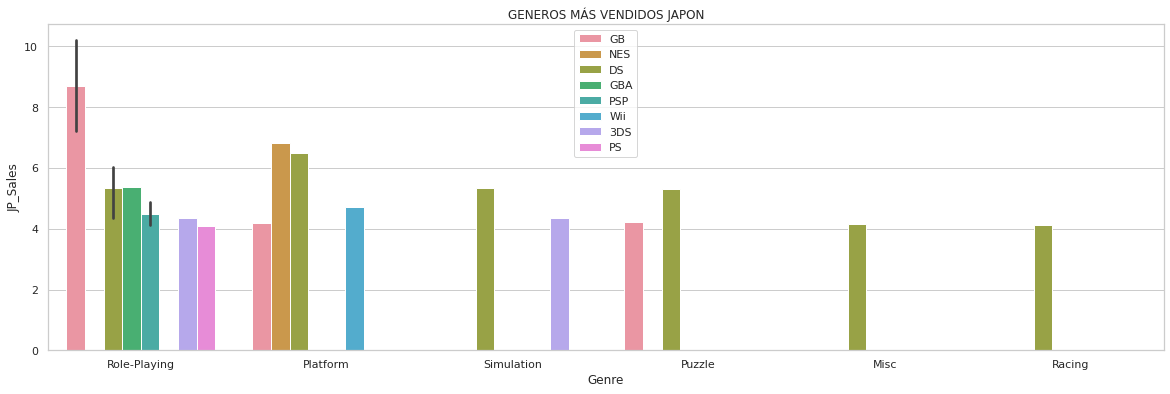

In [42]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS JAPON')
plt.legend()

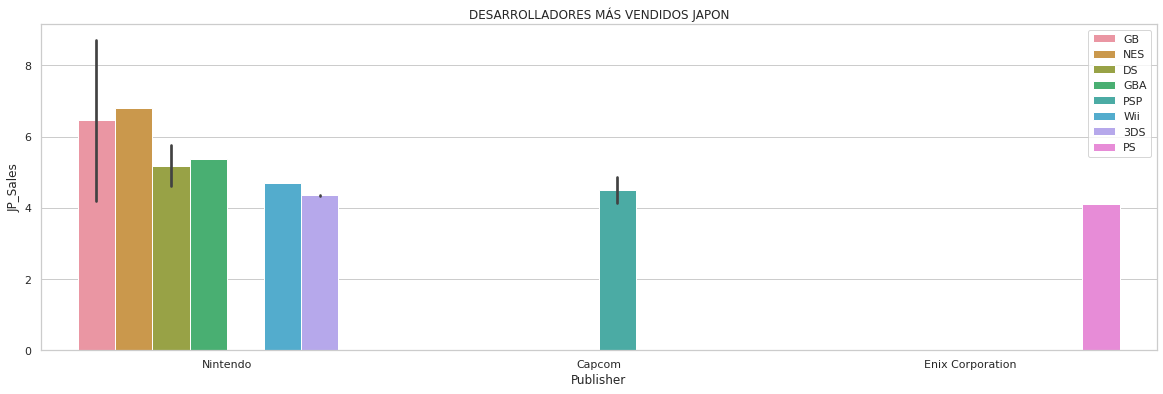

In [43]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS JAPON')
plt.legend()

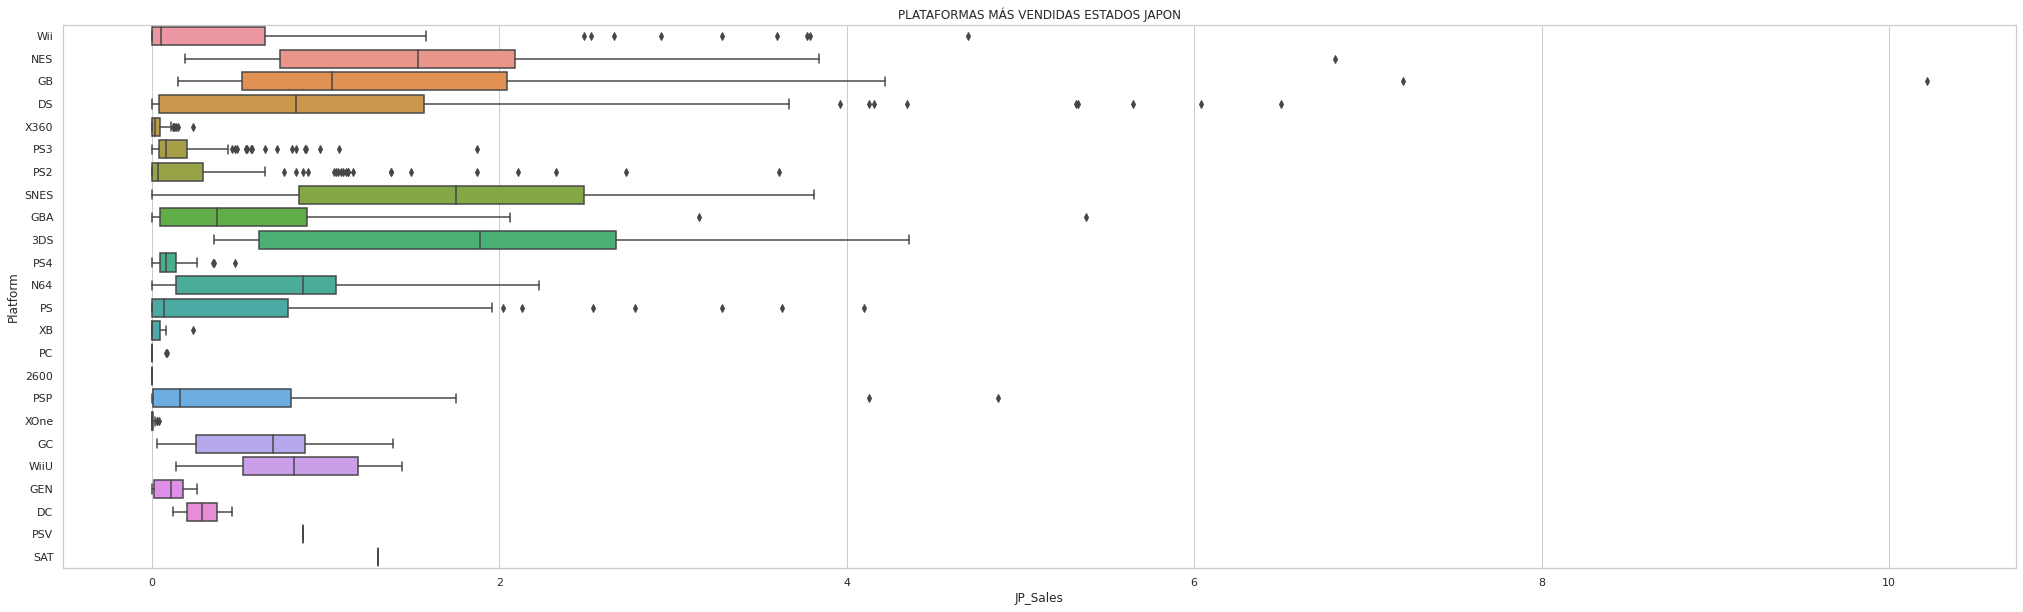

In [44]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'JP_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS JAPON')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Japón se lo lleva el género de Role-Playing o RPG, más precisamente con los juegos Pokemon Red y Pokemos Blue con más de 10 millones en ventas.

También podemos observar que los japoneses han tenido un consumo preferente por juegos y consolas propios del país, producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores como Capcom que han tenido grandes entregas como Resident Evil y Street Fighter. 

Finalmente vemos que en Japón existe un consumo de juegos de género no tan variado, liderando las ventas los juegos de RPG, para todas las consolas disponibles de Nintendo. 
Cabe destacar a la Nintendo DS, que si bien no ha superado en ventas a la Nintendo NES o a la GameBoy, ha permanecido como plataforma definitiva para géneros menos populares como Simulación, Puzzle, Misc y Carreras.

Es interesante ver que en Japón lideran los juegos y consolas nacionales, notandose una menor diversidad de consumos de géneros, y cómo las plataformas de Estados Unidos han tenido apenas relevancia con ventas de la Playstation Vita, lo cual deja en evidencia que Japón tiene preferencia por plataformas portátiles.

######EUROPA:

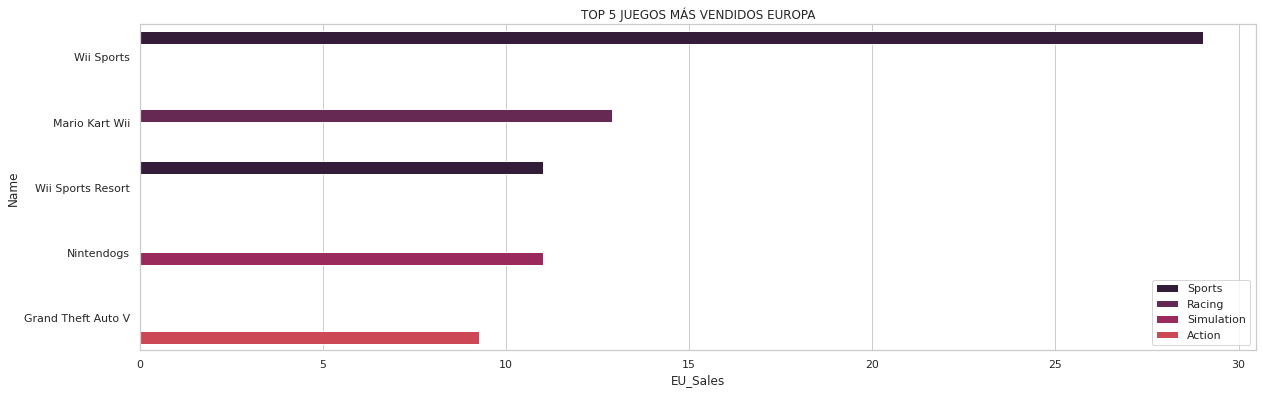

In [45]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='EU_Sales',hue='Genre',data=df.sort_values('EU_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS EUROPA')
plt.legend()

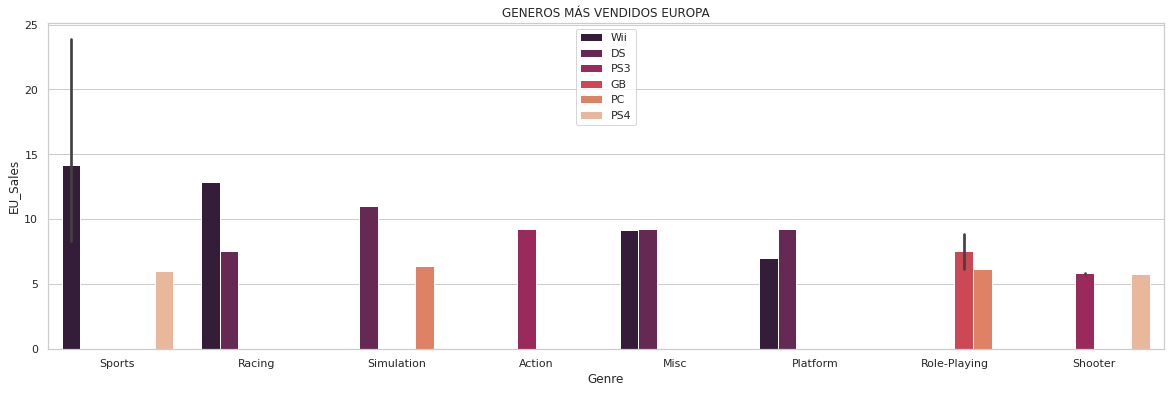

In [46]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS EUROPA')
plt.legend()

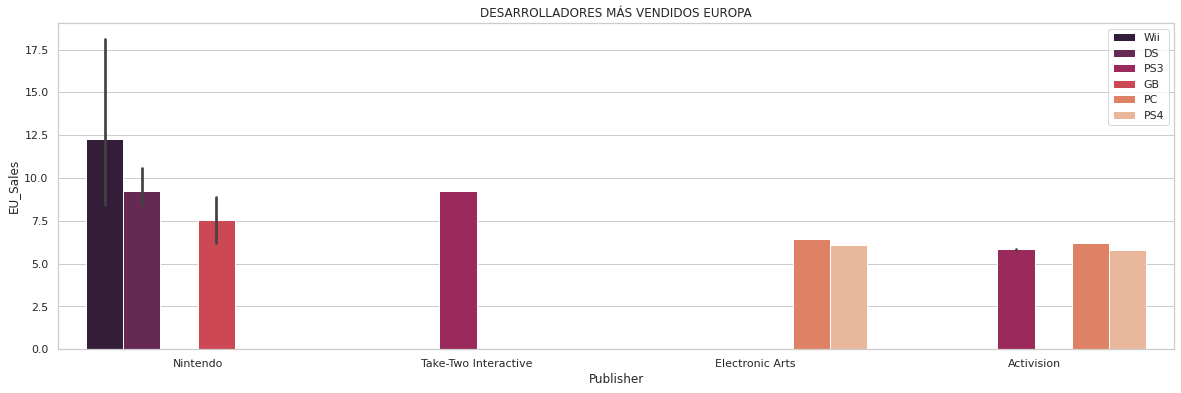

In [47]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS EUROPA')
plt.legend()

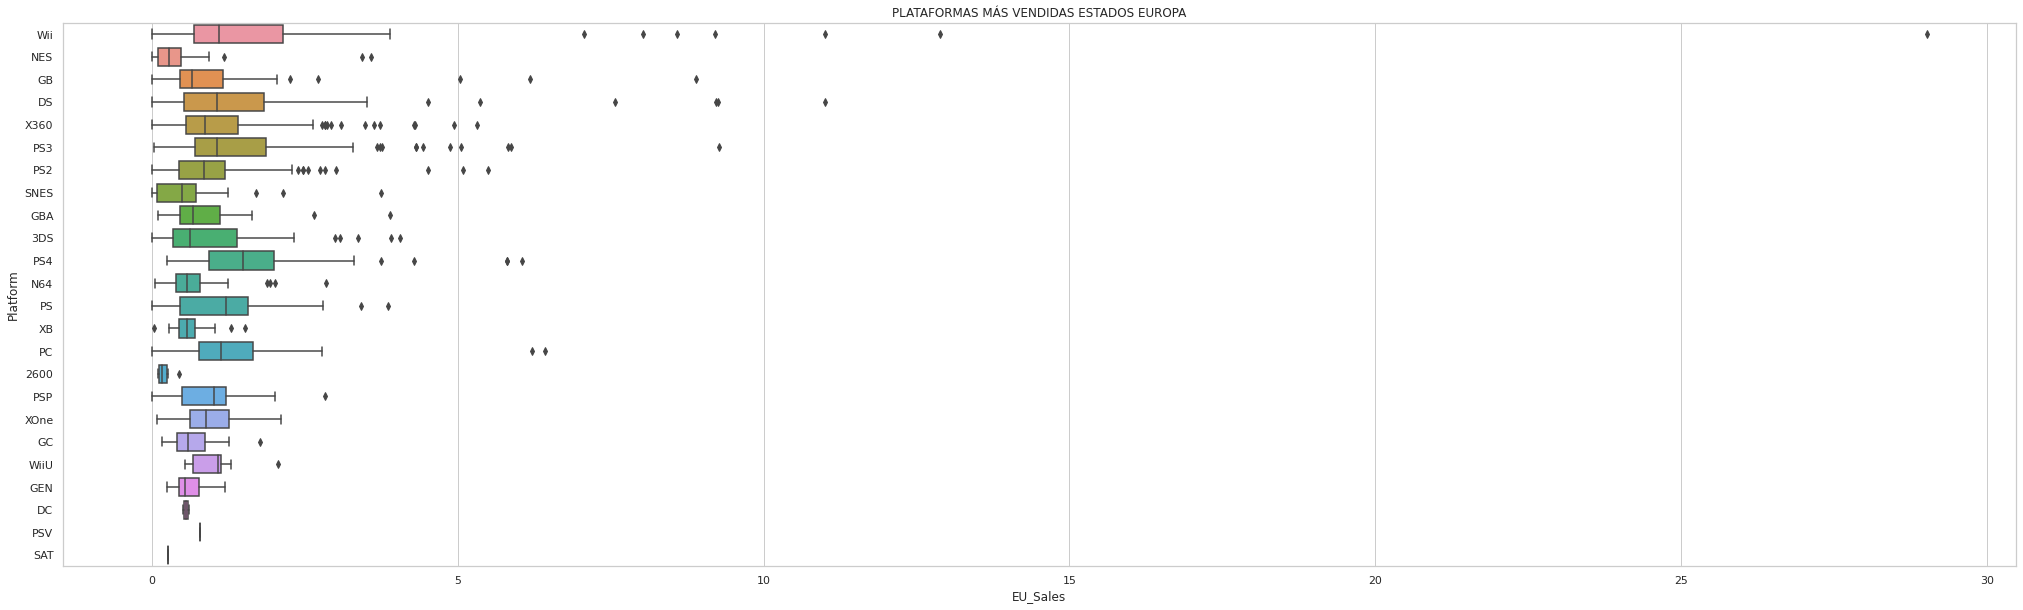

In [48]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'EU_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS MÁS VENDIDAS ESTADOS EUROPA')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Europa se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con casi 30 millones en ventas.

También podemos observar que los europeos han tenido un consumo muy parecido al de Estados Unidos, con una preferencia a juegos producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores americanos como Electronic Arts y Activision que ya habíamos mencionado anteriormente. 

Finalmente vemos que en Europa existe un consumo bastante parejo de juegos, pero con géneros muy variado, casi como si se aceptara lo mejor de Estados Unidos y lo mejor de Japón, liderando las ventas los juegos de Deportes, Carreras, Simulación y Acción, en donde compiten plataformas como Nintendo y Playstation.
Cabe destacar que ha aparecido la PC como plataforma de juegos, que si bien no ha superado en ventas a la Nintendo o la Playstation, ha permanecido como alternativa a las plataformas antes menciondas, gracias a la posibilidad de permitir jugar juegos de cualquier desarrollador sea de Nintendo, Sony o Microsoft.

Es interesante ver que en Europa lideran los juegos y consolas japoneses, pero a diferencia de Estados Unidos o Japón, los europeos consumen una mayor diversidad de géneros y plataformas, teniendo preferencia por géneros que tengan cierto vínculo con la realidad como Deportes, Carreras y Simulación. 

####Análisis descriptivo e inferencial multivariado

#####CANTIDAD DE JUEGOS POR PLATAFORMA:

In [49]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0      Wii     41.49     29.02      3.77         8.46
1      NES     29.08      3.58      6.81         0.77
2      Wii     15.85     12.88      3.79         3.31
3      Wii     15.75     11.01      3.28         2.96
4       GB     11.27      8.89     10.22         1.00

In [50]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()
comp_table1 = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table1.head()

Platform Sale_Area  Sale_Price
0     2600  NA_Sales       80.78
1      3DO  NA_Sales        0.00
2      3DS  NA_Sales       78.03
3       DC  NA_Sales        5.43
4       DS  NA_Sales      388.56

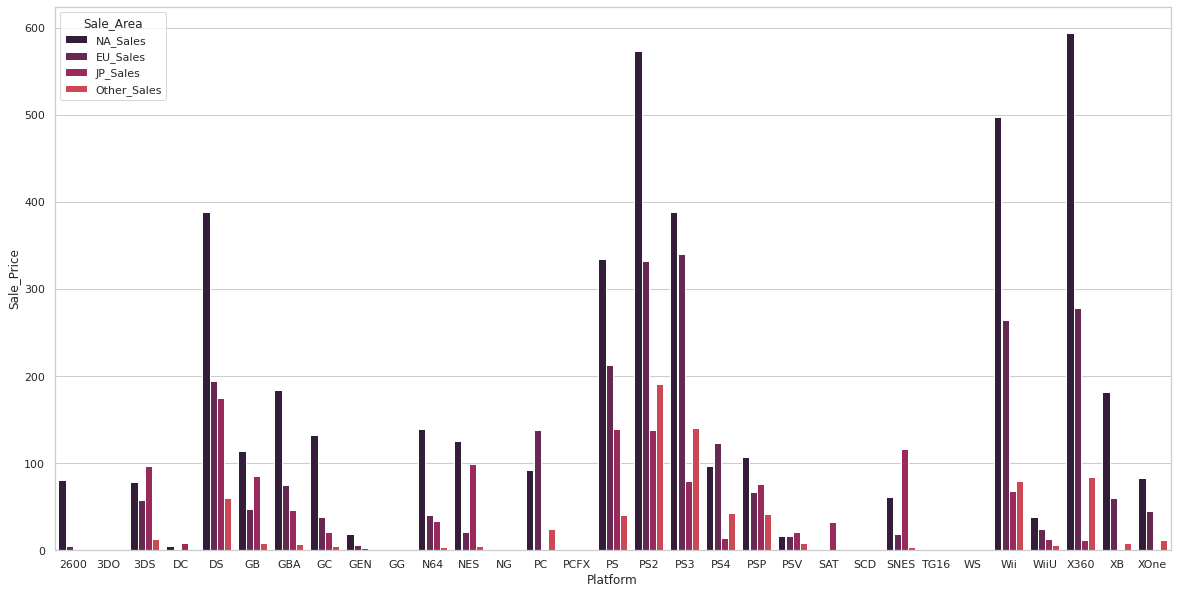

In [51]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table1)
plt.show()

Podemos observar como la PS2 y la DS son las plataformas que más juegos tienen en el mercado, esto se puede deber a la antigüedad en el mercado de las consolas. Lo que nos lleva automáticamente a pensar que son consolas fuertes en sus ventas debido a la gran oferta de juegos que tienen disponibles.

Esta claro que la XBox360, la Nintendo Wii, las Playstation 1, 2 y 3 y la Nintendo DS son los líderes del mercado, con Estados Unidos como el máximo consumidor de estas plataformas.

Ninguna de ellas es la consola de última generación, lo que se puede deber a dos principales características, el tiempo que las consolas tienen en el mercado es superior a las consolas de última generación como la PS4 y la accesibilidad económica es superior a estas también.


#####VENTAS DE JUEGOS POR GÉNERO A NIVEL MUNDIAL:


In [52]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre.head()

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0        Sports     41.49     29.02      3.77         8.46
1      Platform     29.08      3.58      6.81         0.77
2        Racing     15.85     12.88      3.79         3.31
3        Sports     15.75     11.01      3.28         2.96
4  Role-Playing     11.27      8.89     10.22         1.00

In [53]:
comp_genre = comp_genre.groupby(by=['Genre']).sum().reset_index()
comp_table2 = pd.melt(comp_genre, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table2.head()

Genre Sale_Area  Sale_Price
0     Action  NA_Sales      861.80
1  Adventure  NA_Sales      102.06
2   Fighting  NA_Sales      220.74
3       Misc  NA_Sales      402.48
4   Platform  NA_Sales      445.99

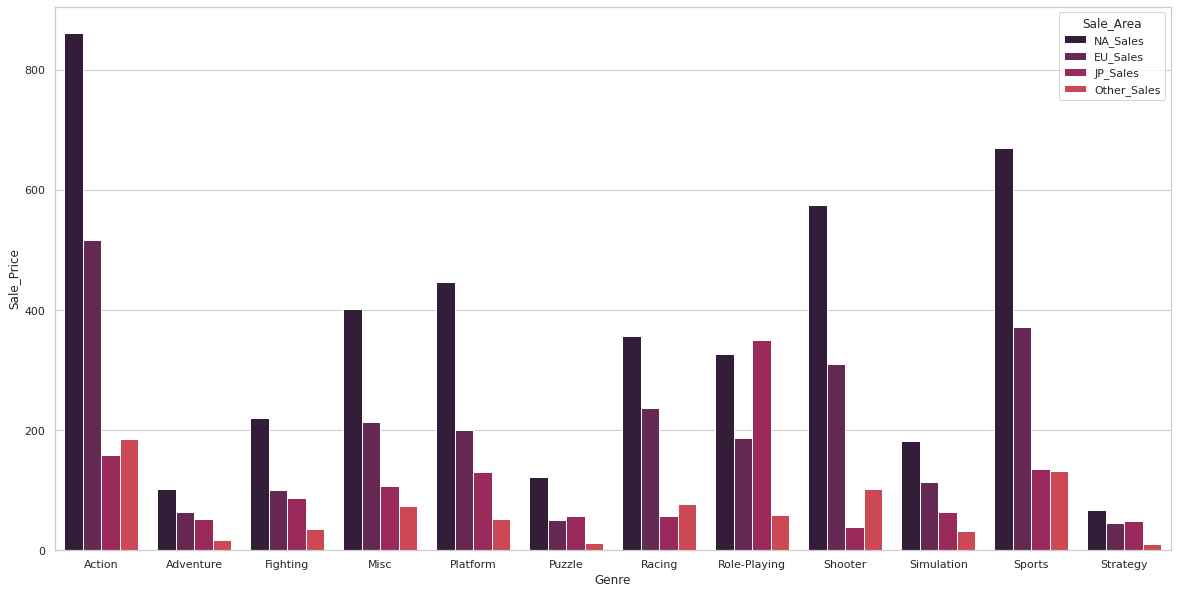

In [54]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table2)
plt.show()

A partir del gráfico podemos ver cómo los juegos RPG (o Role-Playing) son los únicos en los cuales las ventas en Japón superan a Estados Unidos. Esto habla del tamaño superior de ventas de Estados Unidos frente a los otros mercados.

En los demás géneros, se puede apreciar cierta similitud en consumo, donde lidera Estados Unidos, esto significa que si un género fue record de ventas, lo fue tanto en Estados Unidos como en Europa. Inclusive en los géneros Acción, Shooter y Racing las ventas alrededor del mundo fueron aún mayores que en Japón.

Podemos afirmar cómo el mercado europeo es similar en gustos y características al mercado de Estados Unidos y a su vez estos son bastante diferentes a los gustos del mercado japonés.

Finalmente, es notoria la popularidad que tienen juegos de Acción, Deportes y Shooter en el mercado. Si se quisiera desarrollar un nuevo juego con posibilidad de tener un gran mercado para insertarse, sería ideal que pertenezca a alguno de los géneros antes mencionados.

### ***5) Distribución e identificación de Outliers***

Posterior al analisis generalizado del contexto de la base de datos continuamos con la preparación del dataset observando la distibución de datos así como la existencia de outliers que debamos eliminar para no tener un impacto negativo en nuestro análisis para posteriormente volver a analizar cuanto se modifico su comportamiento.

####Analizaremos las variables relacionadas con la cantidad de ventas de videojuegos por año:



Text(0, 0.5, 'Ventas en por año')

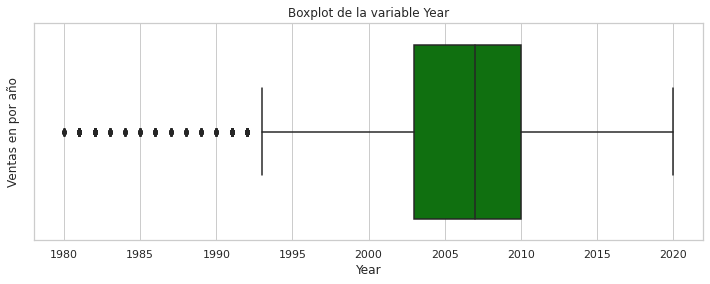

In [55]:
#Se grafica las variables de cantidad de ventas para detectar outliers.
fig, ax = plt.subplots(figsize=(12, 4))
ax = sns.boxplot(x=df["Year"], data=df, color='green')
plt.title('Boxplot de la variable Year')
ax.set_ylabel('Ventas en por año')

Podemos observar que en los percentiles inferiores hay outliers, pero además, los datos no son relevantes para nuestro análisis, ya que la mayoría de consolas y desarrolladores de juegos de antes del 2000 ya no se encuentran vigentes, por lo que es necesario realizar alguna corrección.

In [56]:
#Veremos los Outliers y los analizaremos. Principalmente veremos los percentiles 30% y 90% e iremos cambiando para encontrar los outliers más distorsivos 
p30 = np.percentile(df['Year'], 30)
p90 = np.percentile(df['Year'], 90)

In [57]:
dfp30=df[(df['Year'] <= p30)]
dfp30['Year'].describe()

count    5172.000000
mean     1999.631477
std         4.526285
min      1980.000000
25%      1998.000000
50%      2001.000000
75%      2003.000000
max      2004.000000
Name: Year, dtype: float64

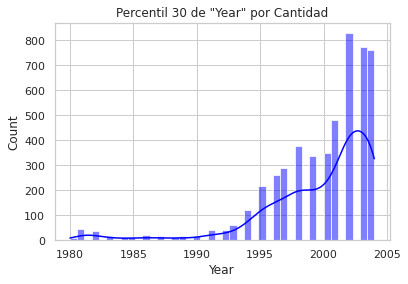

In [58]:
#Histograma de ventas del percentil 30
sns.histplot(dfp30['Year'], color='blue',kde=True).set(title='Percentil 30 de "Year" por Cantidad')
plt.show()

In [59]:
dfp90=df[(df['Year'] >= p90)]
dfp90['Year'].describe()

count    2090.000000
mean     2014.368900
std         1.052608
min      2013.000000
25%      2013.000000
50%      2014.000000
75%      2015.000000
max      2020.000000
Name: Year, dtype: float64

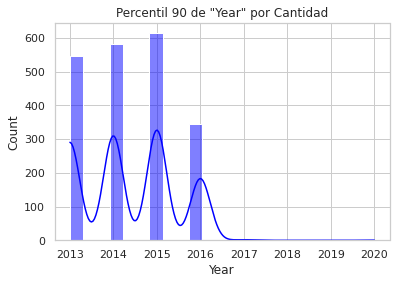

In [60]:
#Histograma de ventas del percentil 90
sns.histplot(dfp90['Year'],color='blue',kde=True).set(title='Percentil 90 de "Year" por Cantidad')
plt.show()

Se eliminan los outliers más distorsivos para nuestro analisis

In [61]:
df = df[(df['Year'] >= p30) & (df['Year'] <= p90)]

In [62]:
df['Year'].describe()

count    10374.000000
mean      2008.350010
std          2.513247
min       2004.000000
25%       2006.000000
50%       2008.000000
75%       2010.000000
max       2013.000000
Name: Year, dtype: float64

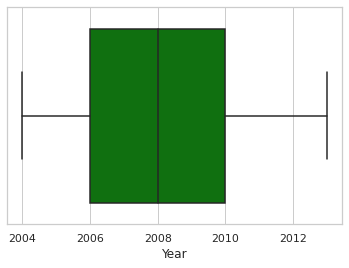

In [63]:
ax = sns.boxplot(x=df['Year'], data=df,color='green')

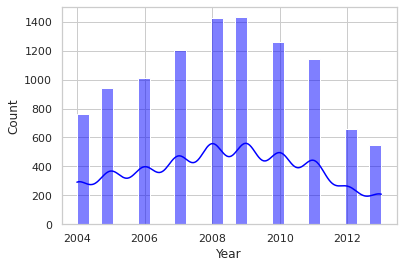

In [64]:
ax = sns.histplot(df['Year'],color='blue',kde=True)
plt.show()

En los gráficos anteriores se observa que se logró obtener un histograma y un boxplot simétricos que muestran que quedaron limpios de outliers que distorsionen nuestro análisis.



####Analisis generalizado posterior a la eliminacion de Outliers.

Verificaremos como quedo el DataBase posterior a la eliminacion de los datos mas distorisivos.

In [65]:
df

Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
...      ...                                                ...      ...   
16590  16593  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16591  16594                                Myst IV: Revelation       PC   
16592  16595                                           Plushees       DS   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                         Know How 2       DS   

       Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006        Sports            Nintendo     41.49     29.02      3.77   
2      2008        Racing            Nintendo     15.85     12.88      3.79   
3      2009        Sports            Nintendo     15.75     11.01      3.28   
6      2006      Platform            Nintendo     11.38      9.23      6.50   
7      2006          Misc            Nintendo     14.03      9.20      2.93   
...     ...           ...                 ...       ...       ...       ...   
16590  2007  Role-Playing  Falcom Corporation      0.00      0.00      0.01   
16591  2004     Adventure             Ubisoft      0.01      0.00      0.00   
16592  2008    Simulation           Destineer      0.01      0.00      0.00   
16595  2008        Racing          Activision      0.00      0.00      0.00   
16596  2010        Puzzle            7G//AMES      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
2             3.31         35.82  
3             2.96         33.00  
6             2.90         30.01  
7             2.85         29.02  
...            ...           ...  
16590         0.00          0.01  
16591         0.00          0.01  
16592         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  

[10374 rows x 11 columns]

Podemos verificar que se redujeron los datos que no cumplian con las condiciones marcadas anteriormente, finalmente nos quedamos con un total de 10374 filas y 11 columnas. Posteriormente realizaremos un analisis con graficos generalizados para poder verificar el comportamiento de los datos.

<ipython-input-66-0213f8071006>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_new = df.groupby(['Genre'])['NA_Sales', 'EU_Sales','JP_Sales',].sum()


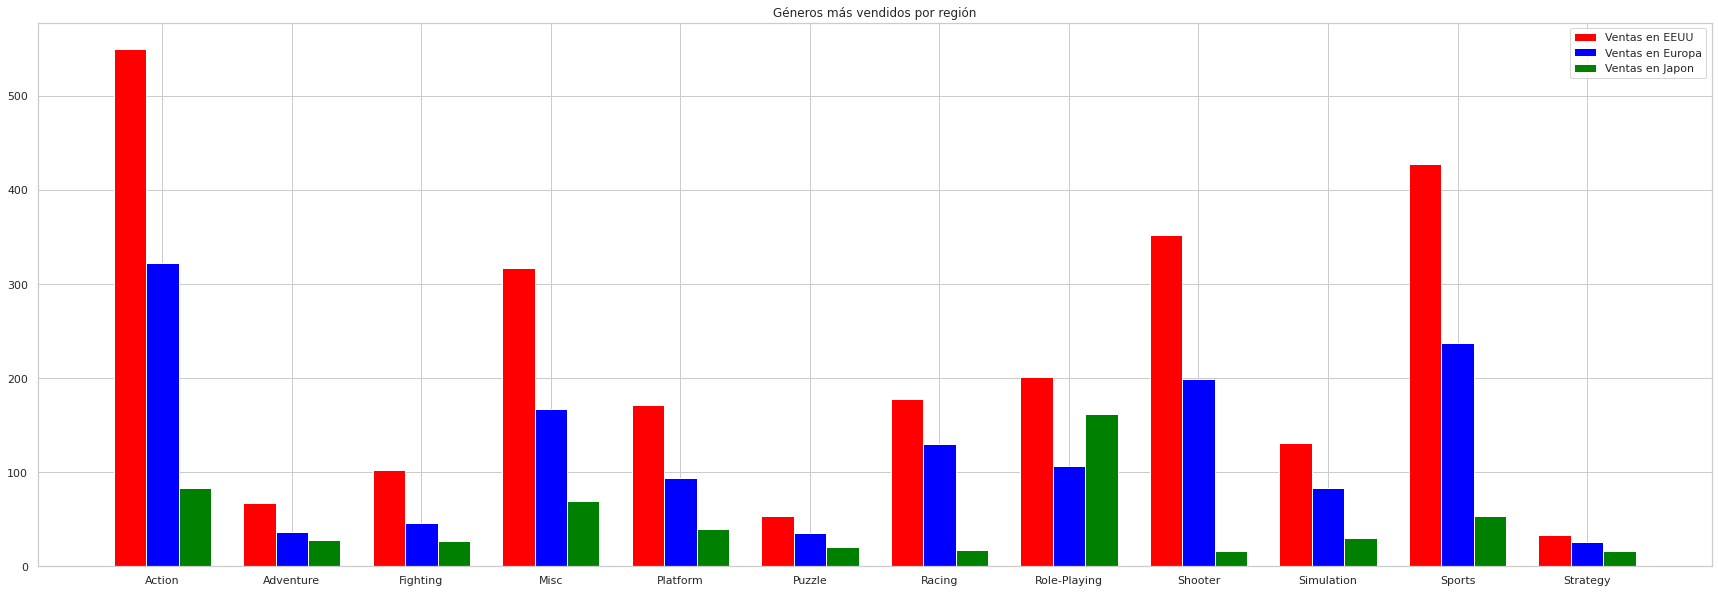

In [66]:
df_new = df.groupby(['Genre'])['NA_Sales', 'EU_Sales','JP_Sales',].sum()
n = len(df_new.index)
x = np.arange(n)
width = 0.25
fig, ax = plt.subplots(figsize=(30,10))
plt.title('Géneros más vendidos por región')
plt.bar(x - width, df_new.NA_Sales, width=width, label='Ventas en EEUU', color = 'red')
plt.bar(x, df_new.EU_Sales, width=width, label='Ventas en Europa', color = 'blue')
plt.bar(x + width, df_new.JP_Sales, width=width, label='Ventas en Japon', color = 'green')
plt.xticks(x, df_new.index)
plt.legend(loc='best')
plt.show()

En las graficas brindadas podemos ver principalmente las apariciones de los generos mas cotizados donde lleva la delantera los juegos de tipo Sports, Action y Shooter liderando con un fuerte recuento.

Teniendo en cuenta nuestro análisis anterior, el género más recomendado para acceder al mercado de Estados Unidos, Europa y Japón sería el de Sports.

Text(0.5, 0, 'Género')

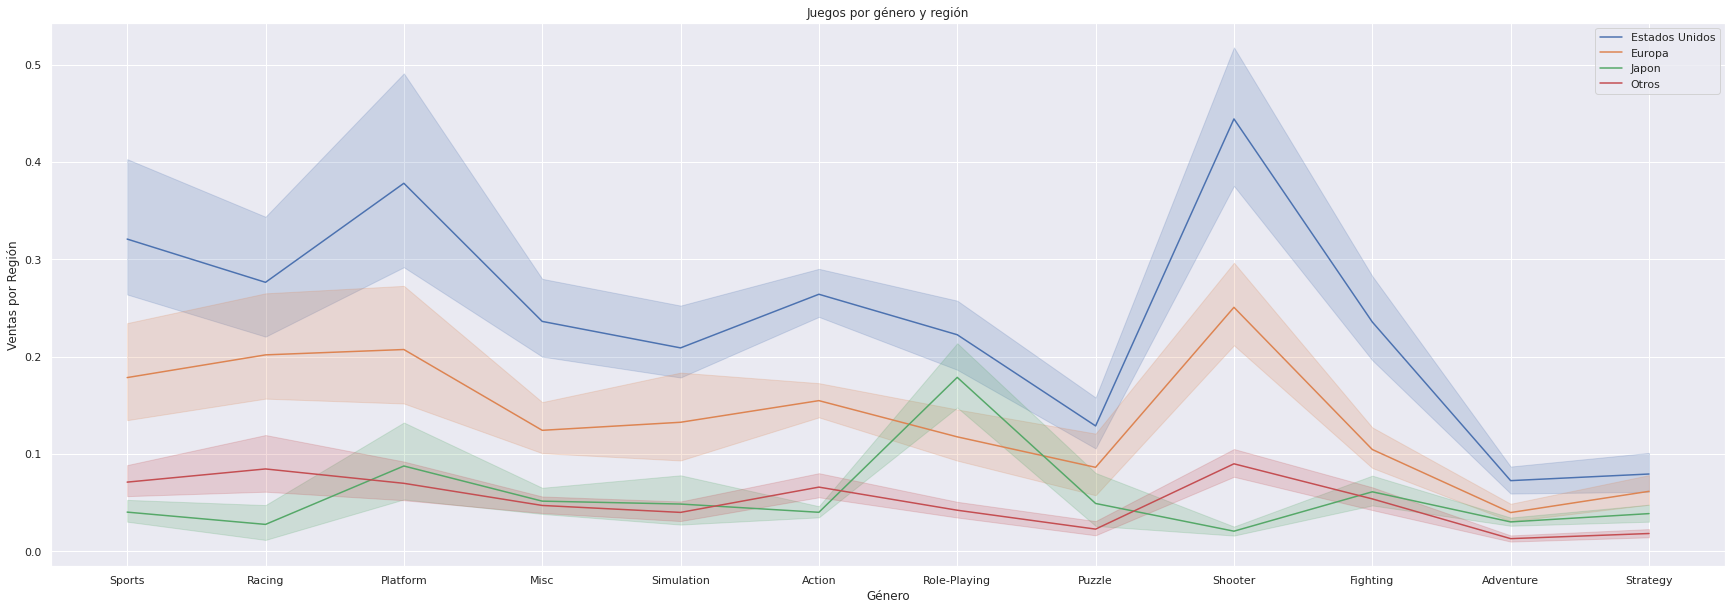

In [67]:
sns.set(rc = {'figure.figsize':(30,10)})
sns.lineplot(data=df, x='Genre', y="NA_Sales")
sns.lineplot(data=df, x='Genre', y="EU_Sales")
sns.lineplot(data=df, x='Genre', y='JP_Sales')
sns.lineplot(data=df, x='Genre', y='Other_Sales')
plt.legend(labels=["Estados Unidos","Europa","Japon", "Otros"])
plt.title("Juegos por género y región")
plt.ylabel("Ventas por Región")
plt.xlabel("Género")

Esta visualizacion nos permite confirmar el comportamiento a nivel de consumo seccionado por genero segun la región. Para el mismo confirmamos que Europa y Norte America definen gustos similares en cuanto a cantidad de géneros consumidos como se mecionó anteriormente, mientras que en Japón existe un gran consumo de juegos de tipo Role-Playing.

Text(0.5, 0, 'Plataforma')

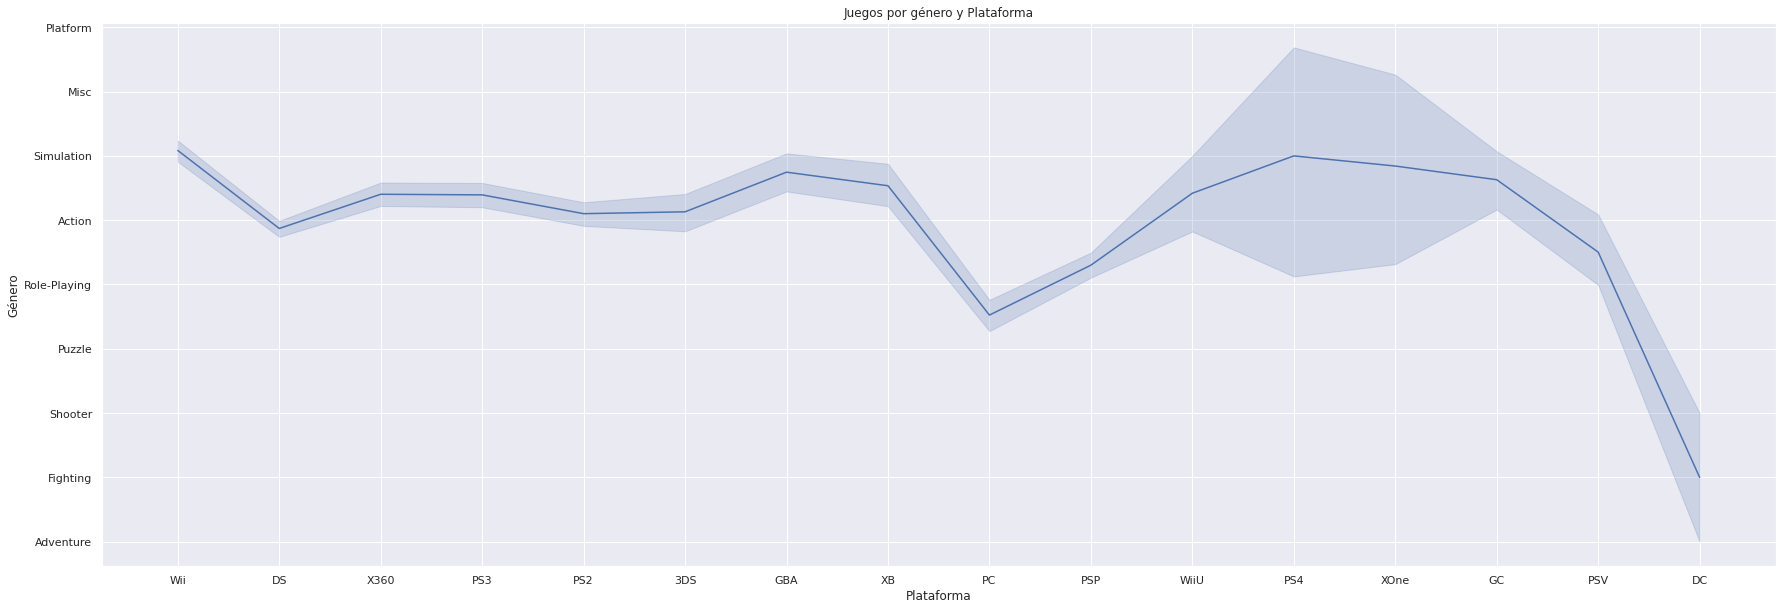

In [68]:
sns.lineplot(data=df, x='Platform', y="Genre")
sns.set(rc = {'figure.figsize':(30,10)})
plt.title("Juegos por género y Plataforma")
plt.ylabel("Género")
plt.xlabel("Plataforma")

Este grafico nos permite diferenciar el comportamiento entre las plataformas y los generos, esto nos permite identificar el como cada consola es centrada a un determinado enfoque de tipo de genero en cuanto al juego.

[]

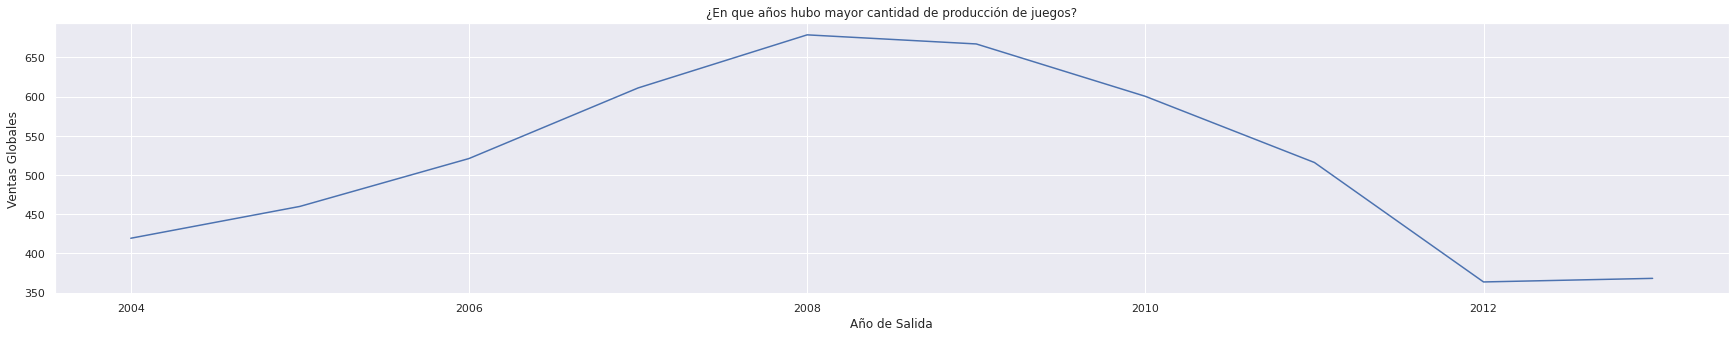

In [69]:
df_1 = df[['Global_Sales','Year']].groupby(by='Year').sum('Global_Sales')
df_1
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(df_1.index,df_1.Global_Sales)
ax.set_xlabel('Año de Salida')                  
ax.set_ylabel('Ventas Globales')
ax.set_title('¿En que años hubo mayor cantidad de producción de juegos?')
plt.plot()

Esta visualización nos permite ver el comportamiento de la cantidad de lanzamientos que se registraron por año, viendo las grandes confluencias con los mayores parametros en aumento hasta el año 2008, para posteriormente pasar a una tendencia bajista hasta la actualidad.

In [70]:
from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
year_wise_sales = df.loc[:, ['Name', 'Year', 'NA_Sales', 'EU_Sales', 
                             'JP_Sales', 'Other_Sales']].groupby(by =  'Year'  ).sum()
fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['NA_Sales'],
                  name = "Ventas en Estados Unidos",line_shape='vh' )
fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['EU_Sales'],
                  name = "Ventas en Europa",line_shape='vh')
fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['JP_Sales'],
                  name = "Ventas en Japón",line_shape='vh')
fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['Other_Sales'],
                  name = "Otras ventas",line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]
layout = dict(title = 'Cantidad de Ventas totales por año según su región.',
              xaxis= dict(title= 'Año' ), yaxis= dict(title= 'Total de ventas en millones',))

figure = dict(data = figs, layout = layout)
iplot(figure)

Esta visualizacion nos permite verificar de manera mas detallada el comportamiento diferenciado por zona según la cantidad de ventas, donde verificamos un comportamiento bastante similar entre Europa y Norte America, mientras que en ciertos períodos la cantidad de ventas en del resto del mundo supera a las de Japón.

# **Feature Engineering.**

## ***Encoding.***

### ***Selección de Feature y Entrenamiento.***

In [71]:
df1 = df
df1

Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
...      ...                                                ...      ...   
16590  16593  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16591  16594                                Myst IV: Revelation       PC   
16592  16595                                           Plushees       DS   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                         Know How 2       DS   

       Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006        Sports            Nintendo     41.49     29.02      3.77   
2      2008        Racing            Nintendo     15.85     12.88      3.79   
3      2009        Sports            Nintendo     15.75     11.01      3.28   
6      2006      Platform            Nintendo     11.38      9.23      6.50   
7      2006          Misc            Nintendo     14.03      9.20      2.93   
...     ...           ...                 ...       ...       ...       ...   
16590  2007  Role-Playing  Falcom Corporation      0.00      0.00      0.01   
16591  2004     Adventure             Ubisoft      0.01      0.00      0.00   
16592  2008    Simulation           Destineer      0.01      0.00      0.00   
16595  2008        Racing          Activision      0.00      0.00      0.00   
16596  2010        Puzzle            7G//AMES      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
2             3.31         35.82  
3             2.96         33.00  
6             2.90         30.01  
7             2.85         29.02  
...            ...           ...  
16590         0.00          0.01  
16591         0.00          0.01  
16592         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  

[10374 rows x 11 columns]

Según el análisis y visualizaciones previas, podemos corroborar que el género Action o Sports son los más recomendados para comercializar en todas las regiones, por ende centraremos las siguientes técnicas de entrenamiento de modelo de machine learning en dichos géneros.

###Feature: Sports

In [72]:
sports_df = df1[df1['Genre']=='Sports']
sports_df

Rank                                Name Platform  Year   Genre  \
0          1                          Wii Sports      Wii  2006  Sports   
3          4                   Wii Sports Resort      Wii  2009  Sports   
13        14                             Wii Fit      Wii  2007  Sports   
14        15                        Wii Fit Plus      Wii  2009  Sports   
85        86  Mario & Sonic at the Olympic Games      Wii  2007  Sports   
...      ...                                 ...      ...   ...     ...   
16544  16547    Imagine Figure Skater (JP sales)       DS  2007  Sports   
16558  16561           Pro Evolution Soccer 2008       PC  2007  Sports   
16578  16581       Outdoors Unleashed: Africa 3D      3DS  2011  Sports   
16581  16584                           Fit & Fun      Wii  2011  Sports   
16587  16590            Mezase!! Tsuri Master DS       DS  2009  Sports   

                          Publisher  NA_Sales  EU_Sales  JP_Sales  \
0                          Nintendo     41.49     29.02      3.77   
3                          Nintendo     15.75     11.01      3.28   
13                         Nintendo      8.94      8.03      3.60   
14                         Nintendo      9.09      8.59      2.53   
85                             Sega      2.58      3.90      0.66   
...                             ...       ...       ...       ...   
16544                       Ubisoft      0.00      0.00      0.01   
16558  Konami Digital Entertainment      0.00      0.01      0.00   
16578                       Mastiff      0.01      0.00      0.00   
16581                       Unknown      0.00      0.01      0.00   
16587                   Hudson Soft      0.00      0.00      0.01   

       Other_Sales  Global_Sales  
0             8.46         82.74  
3             2.96         33.00  
13            2.15         22.72  
14            1.79         22.00  
85            0.91          8.06  
...            ...           ...  
16544         0.00          0.01  
16558         0.00          0.01  
16578         0.00          0.01  
16581         0.00          0.01  
16587         0.00          0.01  

[1332 rows x 11 columns]

In [73]:
sports_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [74]:
sports_df = sports_df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
sports_df = sports_df.set_index('Year', drop=True)
sports_df

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
2006     41.49     29.02      3.77         8.46         82.74
2009     15.75     11.01      3.28         2.96         33.00
2007      8.94      8.03      3.60         2.15         22.72
2009      9.09      8.59      2.53         1.79         22.00
2007      2.58      3.90      0.66         0.91          8.06
...        ...       ...       ...          ...           ...
2007      0.00      0.00      0.01         0.00          0.01
2007      0.00      0.01      0.00         0.00          0.01
2011      0.01      0.00      0.00         0.00          0.01
2011      0.00      0.01      0.00         0.00          0.01
2009      0.00      0.00      0.01         0.00          0.01

[1332 rows x 5 columns]

Corroboramos que no haya nulos y segmentamos las columnas por ventas referenciado por año. Ya tenemos el conjunto completo de datos, antes de visualizar el modelo según los datos corroboramos si hay una secuencia de ventas para identificar un patrón.

In [75]:
df1 = df1.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()

<ipython-input-75-8f556991b6cb>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [76]:
df1 = df1.iloc[:-2]
df1

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
2004  0.291730  0.140655  0.054587     0.061979      0.549554
2005  0.257821  0.129586  0.057683     0.043124      0.488778
2006  0.261032  0.128214  0.073145     0.053998      0.516905
2007  0.259609  0.133527  0.050158     0.064559      0.508428
2008  0.246106  0.129132  0.042199     0.057696      0.475420
2009  0.236792  0.133885  0.043249     0.052250      0.466317
2010  0.241652  0.140373  0.047252     0.047577      0.476926
2011  0.211642  0.147006  0.046567     0.047752      0.453020

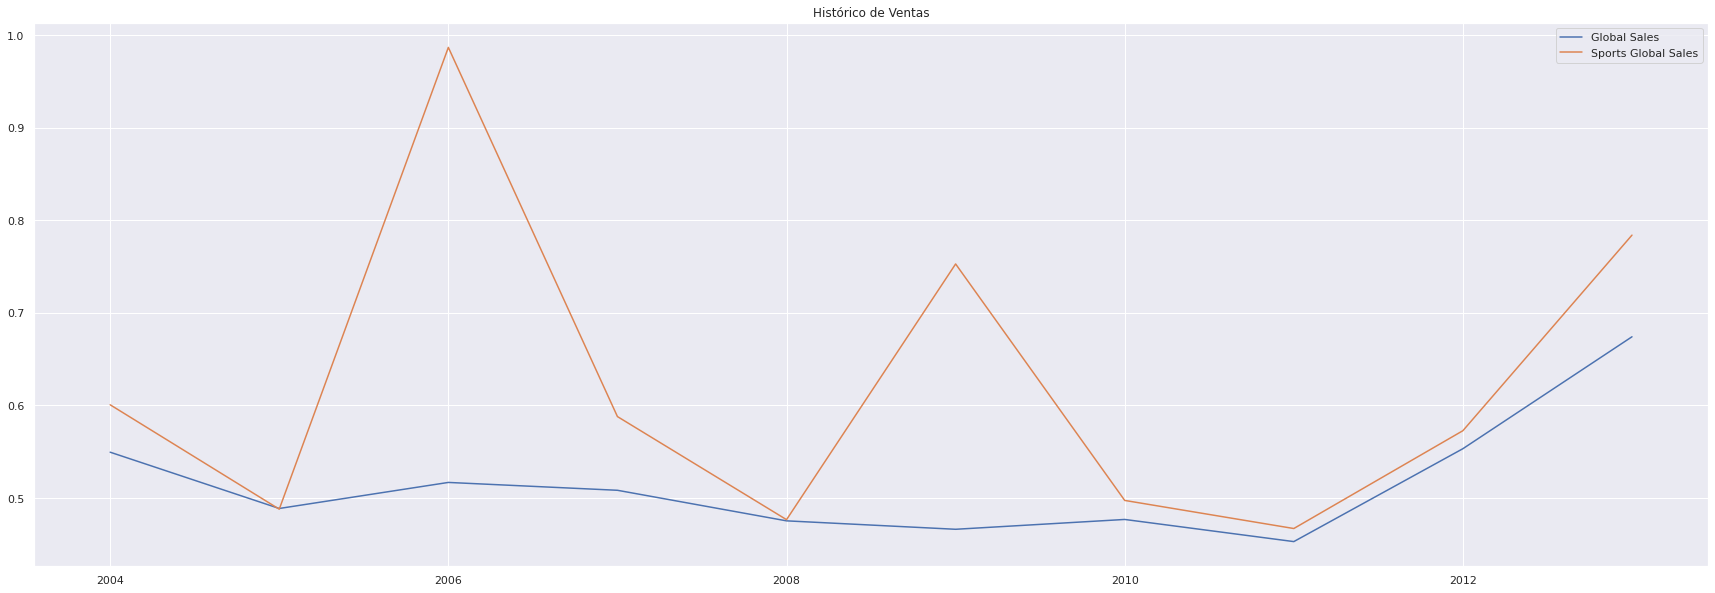

In [77]:
plt.plot(df.groupby('Year')['Global_Sales'].mean(), label='Global Sales')
plt.plot(sports_df.groupby('Year')['Global_Sales'].mean(), label='Sports Global Sales')
plt.legend()
plt.title('Histórico de Ventas')
plt.show()

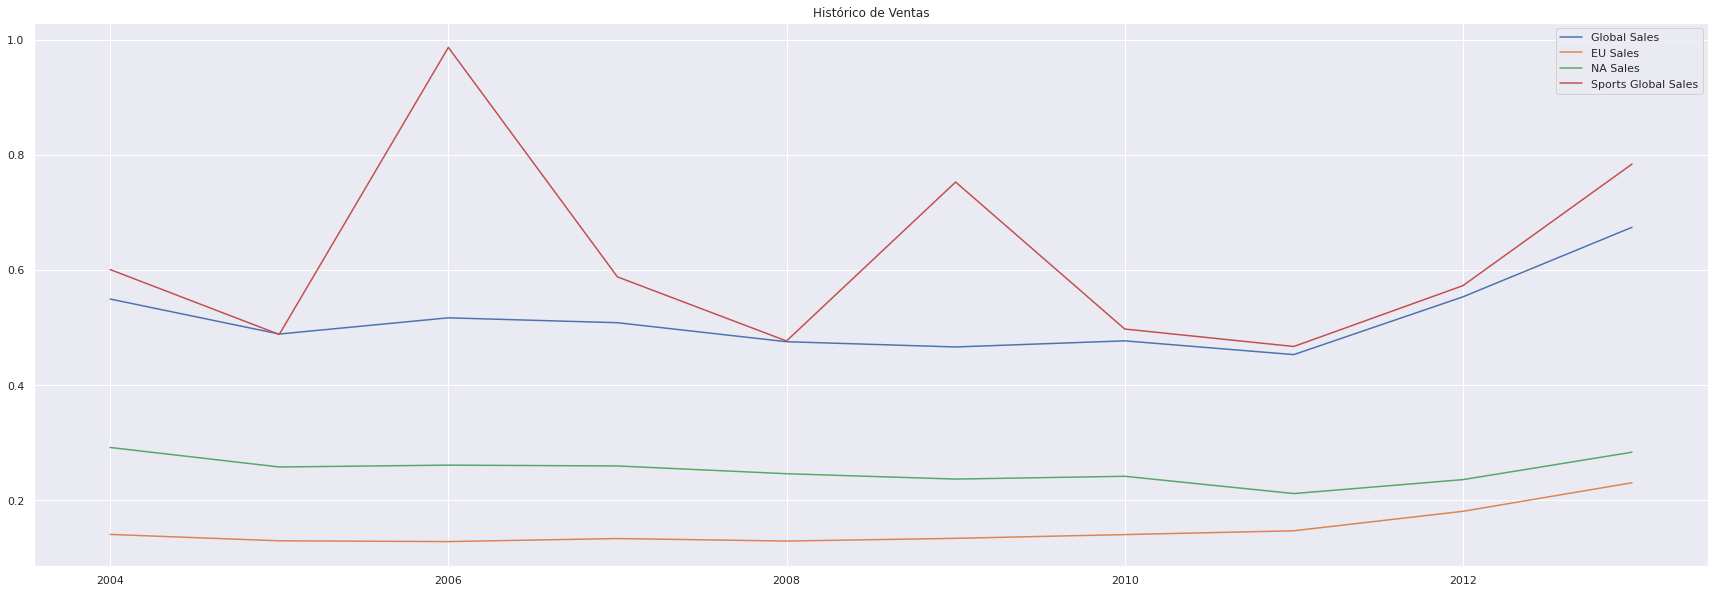

In [78]:
plt.plot(df.groupby('Year')['Global_Sales'].mean(), label='Global Sales')
plt.plot(df.groupby('Year')['EU_Sales'].mean(), label='EU Sales')
plt.plot(df.groupby('Year')['NA_Sales'].mean(), label='NA Sales')
plt.plot(sports_df.groupby('Year')['Global_Sales'].mean(), label='Sports Global Sales')
plt.legend()
plt.title('Histórico de Ventas')
plt.show()

A nivel mundial la venta de videojuegos de deportes es superior en comparación de la media global historica, en general.

In [79]:
sports_df.corr()['Global_Sales']

NA_Sales        0.974749
EU_Sales        0.972311
JP_Sales        0.788392
Other_Sales     0.902053
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

Verificamos que el género Sports efectivamente tiene una alta correlación con las ventas globales, posteriormente con Norteamerica, Europa y por último Japón. Tomaremos a las ventas globales y a la ventas en Norte America para poder predecir.

In [80]:
sports_df = sports_df[['NA_Sales', 'Global_Sales']].sort_index()
sports_df

NA_Sales  Global_Sales
Year                        
2004      0.13          0.27
2004      0.16          0.22
2004      0.00          0.42
2004      0.02          0.04
2004      0.32          0.42
...        ...           ...
2013      1.01          1.07
2013      0.00          0.26
2013      0.00          0.10
2013      0.49          1.19
2013      0.14          0.15

[1332 rows x 2 columns]

In [81]:
sports_df = sports_df.values
sports_df.shape

(1332, 2)

In [82]:
x_data = []
y_data = []
for i in range(len(sports_df)):
    #print(i)
    if i <= len(sports_df):
        x = sports_df[i][:1]
        y = sports_df[i][1]
        x_data.append(x)
        y_data.append(y)

x_data = np.array(x_data)
y_data = np.array(y_data)
x_data.shape, y_data.shape

((1332, 1), (1332,))

In [83]:
sports_df[0], x_data[0]

(array([0.13, 0.27]), array([0.13]))

In [84]:
sports_df[0][:1]==x_data[0], sports_df[0][1] == y_data[0]

(array([ True]), True)

In [85]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Separamos en entrenamiento/test en razon 90/10 %
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.1, random_state=1)

In [86]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1198, 1), (1198,), (134, 1), (134,))

#### ***Modelado-Prediccion.***

In [87]:
# Creamos un modelo de regresión lineal con parametros por defecto
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.5553155952388347

In [88]:
y_pred = modelo.predict(X_test)

In [89]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

Actual  Predicted
0      1.16   1.519579
1      0.03  -0.025532
2      0.32  -0.025532
3      3.63   0.073514
4      0.58   1.044160
..      ...        ...
129    0.51   0.806451
130    1.42   2.252515
131    0.01  -0.025532
132    0.54   0.291414
133    0.02  -0.025532

[134 rows x 2 columns]

#### ***Evaluación de modelos.***

In [90]:
#Evaluacion de modelos
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.31101625535716215
Mean Squared Error: 0.41232107072763247
Root Mean Squared Error: 0.6421223175748001


In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5553155952388347

A modo de conclusión nos está dando un valor r2 del 55%, esto significa nuestro algoritmo apenas explica el 55% de los datos, por lo que el género utilizado no fue un buen parámetro de predicción.

Con respecto a los errores obtenidos, el RMSE fue del 64%, el MAE fue del 31% y el MSE puede apreciarse valor bastante cercano del 41%.

Estaremos analizando lo realizado previamente y haremos un re-ajuste para ver si se modifican los valores.

###Feature: Action

In [92]:
df2 = df
action_df = df2[df2['Genre']=='Action']
action_df

Rank                                           Name Platform  Year  \
16        17                             Grand Theft Auto V      PS3  2013   
17        18                  Grand Theft Auto: San Andreas      PS2  2004   
23        24                             Grand Theft Auto V     X360  2013   
45        46           Pokemon HeartGold/Pokemon SoulSilver       DS  2009   
51        52                            Grand Theft Auto IV     X360  2008   
...      ...                                            ...      ...   ...   
16533  16536                    Metal Gear Solid HD Edition     X360  2011   
16535  16538                                   Mushi Bugyou      3DS  2013   
16537  16540                Transformers: Fall of Cybertron       PC  2012   
16546  16549                   Hyakki Yagyou Kaidan Romance      PSP  2012   
16564  16567  Original Frisbee Disc Sports: Ultimate & Golf       DS  2007   

        Genre                     Publisher  NA_Sales  EU_Sales  JP_Sales  \
16     Action          Take-Two Interactive      7.01      9.27      0.97   
17     Action          Take-Two Interactive      9.43      0.40      0.41   
23     Action          Take-Two Interactive      9.63      5.31      0.06   
45     Action                      Nintendo      4.40      2.77      3.96   
51     Action          Take-Two Interactive      6.76      3.10      0.14   
...       ...                           ...       ...       ...       ...   
16533  Action  Konami Digital Entertainment      0.00      0.00      0.01   
16535  Action            Namco Bandai Games      0.00      0.00      0.01   
16537  Action                    Activision      0.01      0.00      0.00   
16546  Action                      Quinrose      0.00      0.00      0.01   
16564  Action     Destination Software, Inc      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
16            4.14         21.40  
17           10.57         20.81  
23            1.38         16.38  
45            0.77         11.90  
51            1.03         11.02  
...            ...           ...  
16533         0.00          0.01  
16535         0.00          0.01  
16537         0.00          0.01  
16546         0.00          0.01  
16564         0.00          0.01  

[2084 rows x 11 columns]

In [93]:
action_df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [94]:
action_df = action_df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
action_df = action_df.set_index('Year', drop=True)
action_df

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
2013      7.01      9.27      0.97         4.14         21.40
2004      9.43      0.40      0.41        10.57         20.81
2013      9.63      5.31      0.06         1.38         16.38
2009      4.40      2.77      3.96         0.77         11.90
2008      6.76      3.10      0.14         1.03         11.02
...        ...       ...       ...          ...           ...
2011      0.00      0.00      0.01         0.00          0.01
2013      0.00      0.00      0.01         0.00          0.01
2012      0.01      0.00      0.00         0.00          0.01
2012      0.00      0.00      0.01         0.00          0.01
2007      0.01      0.00      0.00         0.00          0.01

[2084 rows x 5 columns]

Corroboramos que no haya nulos y segmentamos las columnas por ventas referenciado por año. Ya tenemos el conjunto completo de datos, antes de visualizar el modelo según los datos corroboramos si hay una secuencia de ventas para identificar un patrón.

In [95]:
df2 = df2.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()

<ipython-input-95-9e3bf19f7f85>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [96]:
df2 = df2.iloc[:-2]
df2

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
2004  0.291730  0.140655  0.054587     0.061979      0.549554
2005  0.257821  0.129586  0.057683     0.043124      0.488778
2006  0.261032  0.128214  0.073145     0.053998      0.516905
2007  0.259609  0.133527  0.050158     0.064559      0.508428
2008  0.246106  0.129132  0.042199     0.057696      0.475420
2009  0.236792  0.133885  0.043249     0.052250      0.466317
2010  0.241652  0.140373  0.047252     0.047577      0.476926
2011  0.211642  0.147006  0.046567     0.047752      0.453020

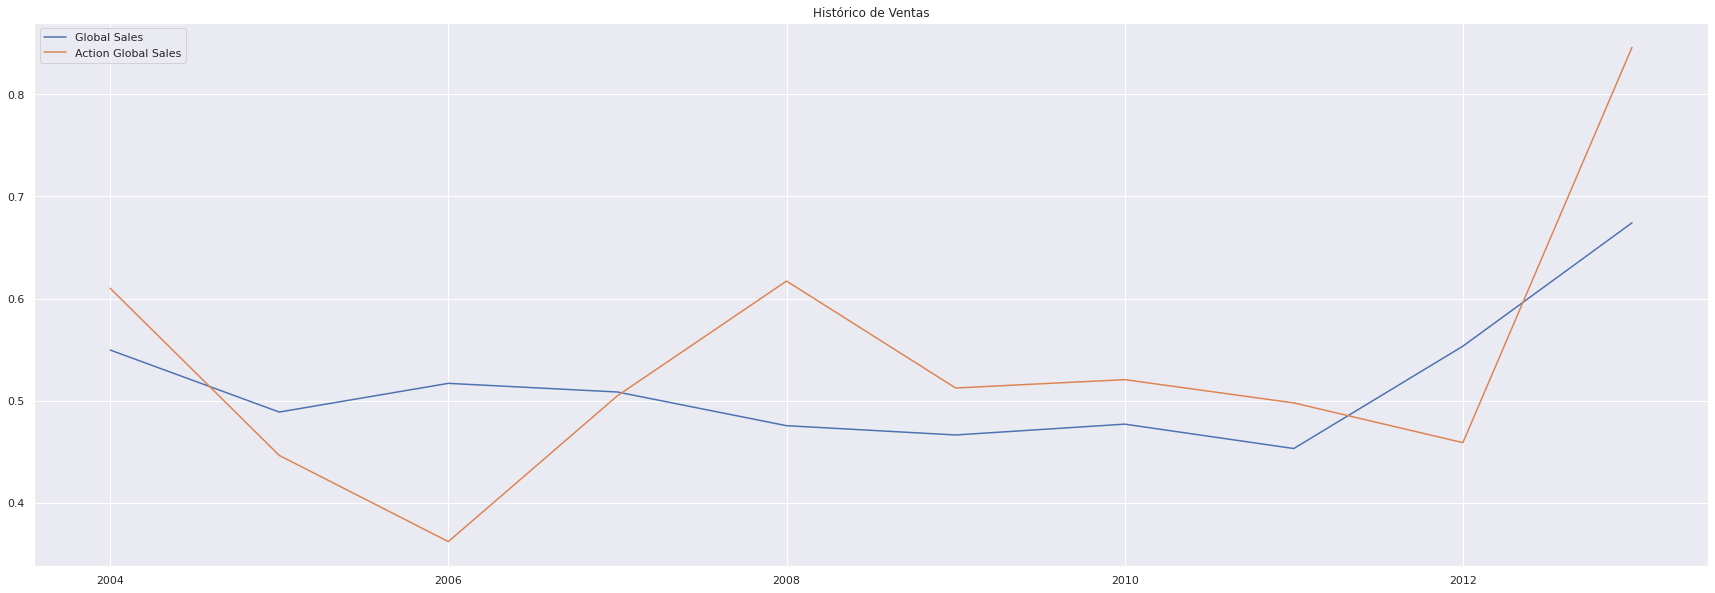

In [97]:
plt.plot(df.groupby('Year')['Global_Sales'].mean(), label='Global Sales')
plt.plot(action_df.groupby('Year')['Global_Sales'].mean(), label='Action Global Sales')
plt.legend()
plt.title('Histórico de Ventas')
plt.show()

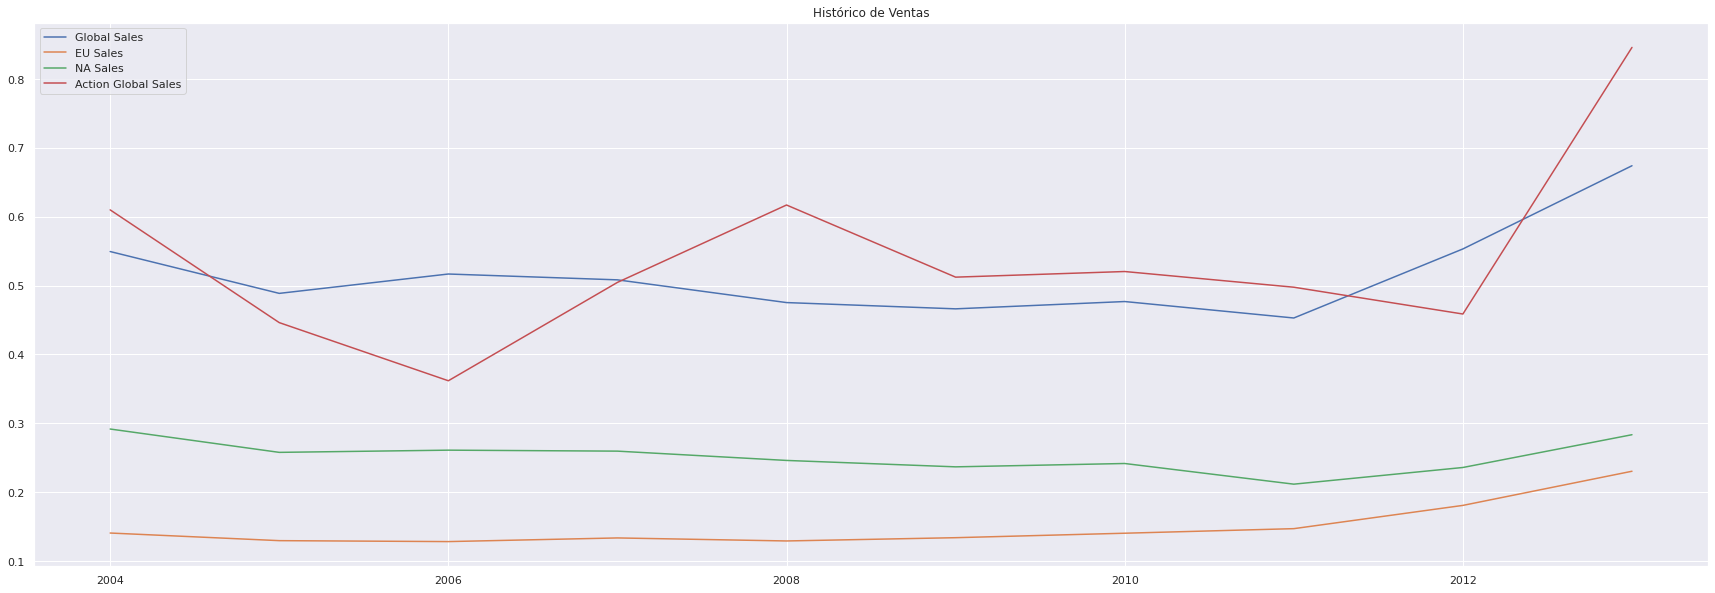

In [98]:
plt.plot(df.groupby('Year')['Global_Sales'].mean(), label='Global Sales')
plt.plot(df.groupby('Year')['EU_Sales'].mean(), label='EU Sales')
plt.plot(df.groupby('Year')['NA_Sales'].mean(), label='NA Sales')
plt.plot(action_df.groupby('Year')['Global_Sales'].mean(), label='Action Global Sales')
plt.legend()
plt.title('Histórico de Ventas')
plt.show()

A nivel mundial la venta de videojuegos de acción es superior en comparación de la media global historica, en general.

In [99]:
action_df.corr()['Global_Sales']

NA_Sales        0.952496
EU_Sales        0.882629
JP_Sales        0.401741
Other_Sales     0.788513
Global_Sales    1.000000
Name: Global_Sales, dtype: float64

Verificamos que el género Action efectivamente tiene una alta correlación con las ventas globales, posteriormente con Norteamerica, Europa y por último Japón. Tomaremos a las ventas globales y a la ventas en Norte America para poder predecir.

In [100]:
action_df = action_df[['NA_Sales', 'Global_Sales']].sort_index()
action_df

NA_Sales  Global_Sales
Year                        
2004      0.03          0.05
2004      0.54          1.64
2004      0.06          0.08
2004      0.04          0.08
2004      0.02          0.02
...        ...           ...
2013      0.00          0.03
2013      0.12          0.27
2013      0.16          0.29
2013      0.00          0.23
2013      7.01         21.40

[2084 rows x 2 columns]

In [101]:
action_df = action_df.values
action_df.shape

(2084, 2)

In [102]:
x_data = []
y_data = []
for i in range(len(action_df)):
    #print(i)
    if i <= len(action_df):
        x = action_df[i][:1]
        y = action_df[i][1]
        x_data.append(x)
        y_data.append(y)

x_data = np.array(x_data)
y_data = np.array(y_data)
x_data.shape, y_data.shape

((2084, 1), (2084,))

In [103]:
action_df[0], x_data[0]

(array([0.03, 0.05]), array([0.03]))

In [104]:
action_df[0][:1]==x_data[0], action_df[0][1] == y_data[0]

(array([ True]), True)

In [105]:
from sklearn.model_selection import train_test_split

# Separamos en entrenamiento/test en razon 90/10 %
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.1, random_state=1)

In [106]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1875, 1), (1875,), (209, 1), (209,))

#### ***Modelado-Prediccion.***

In [107]:
# Creamos un modelo de regresión lineal con parametros por defecto
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.8761803826384414

In [108]:
y_pred = modelo.predict(X_test)

In [109]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

Actual  Predicted
0      0.07  -0.002358
1      0.09   0.156780
2      0.23   0.236348
3      0.04   0.077211
4      0.06  -0.002358
..      ...        ...
204    0.21   0.176672
205    0.27   0.256241
206    0.13   0.136888
207    0.12   0.156780
208    2.29   2.145997

[209 rows x 2 columns]

#### ***Evaluación de modelos.***

In [110]:
#Evaluacion de modelos
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.17904961981786763
Mean Squared Error: 0.09977099376113323
Root Mean Squared Error: 0.3158654678199775


In [111]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8761803826384414

En conclusión, el género utilizado resultó un buen parámetro de predicción ya que logró obtener un alto valor de r2, explicando el 87% de los datos. Con los errores obtenidos, el RMSE fue del 31% y el MAE apenas fue del 17% debido a que es más robusto a los valores atípicos. Con respecto al MSE puede apreciarse un cambio en la interpretación de los datos ya que arrojó un error del 9%, muy por debajo de los demás.

### ***Tuning de Hiperparámetros.***

In [112]:
#Volvemos a utilizar el feature: Action para la predicción
df3 = df
action_df = df3[df3['Genre']=='Action']
action_df

Rank                                           Name Platform  Year  \
16        17                             Grand Theft Auto V      PS3  2013   
17        18                  Grand Theft Auto: San Andreas      PS2  2004   
23        24                             Grand Theft Auto V     X360  2013   
45        46           Pokemon HeartGold/Pokemon SoulSilver       DS  2009   
51        52                            Grand Theft Auto IV     X360  2008   
...      ...                                            ...      ...   ...   
16533  16536                    Metal Gear Solid HD Edition     X360  2011   
16535  16538                                   Mushi Bugyou      3DS  2013   
16537  16540                Transformers: Fall of Cybertron       PC  2012   
16546  16549                   Hyakki Yagyou Kaidan Romance      PSP  2012   
16564  16567  Original Frisbee Disc Sports: Ultimate & Golf       DS  2007   

        Genre                     Publisher  NA_Sales  EU_Sales  JP_Sales  \
16     Action          Take-Two Interactive      7.01      9.27      0.97   
17     Action          Take-Two Interactive      9.43      0.40      0.41   
23     Action          Take-Two Interactive      9.63      5.31      0.06   
45     Action                      Nintendo      4.40      2.77      3.96   
51     Action          Take-Two Interactive      6.76      3.10      0.14   
...       ...                           ...       ...       ...       ...   
16533  Action  Konami Digital Entertainment      0.00      0.00      0.01   
16535  Action            Namco Bandai Games      0.00      0.00      0.01   
16537  Action                    Activision      0.01      0.00      0.00   
16546  Action                      Quinrose      0.00      0.00      0.01   
16564  Action     Destination Software, Inc      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
16            4.14         21.40  
17           10.57         20.81  
23            1.38         16.38  
45            0.77         11.90  
51            1.03         11.02  
...            ...           ...  
16533         0.00          0.01  
16535         0.00          0.01  
16537         0.00          0.01  
16546         0.00          0.01  
16564         0.00          0.01  

[2084 rows x 11 columns]

In [113]:
action_df = action_df[['Year','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]
action_df = action_df.set_index('Year', drop=True)
action_df

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
2013      7.01      9.27      0.97         4.14         21.40
2004      9.43      0.40      0.41        10.57         20.81
2013      9.63      5.31      0.06         1.38         16.38
2009      4.40      2.77      3.96         0.77         11.90
2008      6.76      3.10      0.14         1.03         11.02
...        ...       ...       ...          ...           ...
2011      0.00      0.00      0.01         0.00          0.01
2013      0.00      0.00      0.01         0.00          0.01
2012      0.01      0.00      0.00         0.00          0.01
2012      0.00      0.00      0.01         0.00          0.01
2007      0.01      0.00      0.00         0.00          0.01

[2084 rows x 5 columns]

In [114]:
df3 = df3.groupby('Year')['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].mean()

<ipython-input-114-dd3ddeb94bd4>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [115]:
df3 = df3.iloc[:-2]
df3

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Year                                                         
2004  0.291730  0.140655  0.054587     0.061979      0.549554
2005  0.257821  0.129586  0.057683     0.043124      0.488778
2006  0.261032  0.128214  0.073145     0.053998      0.516905
2007  0.259609  0.133527  0.050158     0.064559      0.508428
2008  0.246106  0.129132  0.042199     0.057696      0.475420
2009  0.236792  0.133885  0.043249     0.052250      0.466317
2010  0.241652  0.140373  0.047252     0.047577      0.476926
2011  0.211642  0.147006  0.046567     0.047752      0.453020

In [116]:
action_df = action_df[['NA_Sales', 'Global_Sales']].sort_index()
action_df

NA_Sales  Global_Sales
Year                        
2004      0.03          0.05
2004      0.54          1.64
2004      0.06          0.08
2004      0.04          0.08
2004      0.02          0.02
...        ...           ...
2013      0.00          0.03
2013      0.12          0.27
2013      0.16          0.29
2013      0.00          0.23
2013      7.01         21.40

[2084 rows x 2 columns]

In [117]:
#Hypertuning utilizando grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 

random_forest = RandomForestRegressor() #Instanciamos el modelo

In [118]:
#Definimos los parámetros de búsqueda
params = {
    'n_estimators' : [50,100,200],
    'max_features': [1,2],
    'criterion': ['squared_error', 'mse', 'absolute_error', 'poisson'],
    'max_depth':[4,5]
}

grid_random_forest = GridSearchCV(estimator = random_forest,
                                  param_grid = params,
                                  scoring = 'neg_mean_absolute_error',
                                  cv = 5, 
                                  verbose = 1, #Muestra el resultado en pantalla
                                  n_jobs = -1) # corrida en paralelo

In [119]:
#Entrenamos el modelo
grid_random_forest.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.8/dist-packages/joblib/parallel.py

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'mse', 'absolute_error',
                                       'poisson'],
                         'max_depth': [4, 5], 'max_features': [1, 2],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error', verbose=1)

In [120]:
#Obtenemos el mejor modelo!
grid_random_forest.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=5, max_features=1,
                      n_estimators=50)

In [121]:
grid_random_forest.best_params_

{'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 1,
 'n_estimators': 50}

In [122]:
random_forest_nuevo = RandomForestRegressor(criterion='absolute_error',max_depth=4, max_features=1, n_estimators=100) #Instanciamos el modelo

In [123]:
random_forest_nuevo.fit(X_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=4, max_features=1)

In [124]:
X_train.shape

(1875, 1)

In [125]:
#Predicción de casos nuevos
y_pred = random_forest_nuevo.predict(X_test)

In [126]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

Actual  Predicted
0      0.07    0.04240
1      0.09    0.10845
2      0.23    0.17545
3      0.04    0.06335
4      0.06    0.04240
..      ...        ...
204    0.21    0.13690
205    0.27    0.23360
206    0.13    0.10795
207    0.12    0.10845
208    2.29    1.93665

[209 rows x 2 columns]

Sólo nos restaría analizar las métricas de error.

#### ***Evaluación de modelos.***

In [127]:
#Evaluacion de modelos
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.16995071770334932
Mean Squared Error: 0.09831189112440196
Root Mean Squared Error: 0.3135472709567123


In [128]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8779911847900552

Finalmente, considerando los parámetros más optimizados para la predicción obtenemos un r2 muy similar al caso anterior, logrando explicar el 87% de los datos obtenidos. Lo mismo sucede con los errores obtenidos, el RMSE fue del 31% y el MAE apenas fue del 17% debido a que es más robusto a los valores atípicos. Con respecto al MSE puede apreciarse un cambio en la interpretación de los datos ya que arrojó un error del 9%, muy por debajo de los demás.

# **Feature Engineering 2.**

## ***Encoding.***

### ***Selección de Feature y Entrenamiento.***

In [129]:
df1 = df
df1

Rank                                               Name Platform  \
0          1                                         Wii Sports      Wii   
2          3                                     Mario Kart Wii      Wii   
3          4                                  Wii Sports Resort      Wii   
6          7                              New Super Mario Bros.       DS   
7          8                                           Wii Play      Wii   
...      ...                                                ...      ...   
16590  16593  Eiyuu Densetsu: Sora no Kiseki Material Collec...      PSP   
16591  16594                                Myst IV: Revelation       PC   
16592  16595                                           Plushees       DS   
16595  16598   SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                         Know How 2       DS   

       Year         Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006        Sports            Nintendo     41.49     29.02      3.77   
2      2008        Racing            Nintendo     15.85     12.88      3.79   
3      2009        Sports            Nintendo     15.75     11.01      3.28   
6      2006      Platform            Nintendo     11.38      9.23      6.50   
7      2006          Misc            Nintendo     14.03      9.20      2.93   
...     ...           ...                 ...       ...       ...       ...   
16590  2007  Role-Playing  Falcom Corporation      0.00      0.00      0.01   
16591  2004     Adventure             Ubisoft      0.01      0.00      0.00   
16592  2008    Simulation           Destineer      0.01      0.00      0.00   
16595  2008        Racing          Activision      0.00      0.00      0.00   
16596  2010        Puzzle            7G//AMES      0.00      0.01      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
2             3.31         35.82  
3             2.96         33.00  
6             2.90         30.01  
7             2.85         29.02  
...            ...           ...  
16590         0.00          0.01  
16591         0.00          0.01  
16592         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  

[10374 rows x 11 columns]

In [130]:
df2 = df[['Genre','NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']]
df2 = df2.groupby('Genre').mean()
df2

NA_Sales  EU_Sales  JP_Sales  Global_Sales
Genre                                                   
Action        0.264069  0.154798  0.040106      0.525259
Adventure     0.072622  0.039837  0.030228      0.156035
Fighting      0.235596  0.104610  0.061147      0.455229
Misc          0.236183  0.124315  0.051562      0.459568
Platform      0.378079  0.207307  0.087660      0.743400
Puzzle        0.128811  0.086286  0.049175      0.288155
Racing        0.276330  0.201804  0.027667      0.590715
Role-Playing  0.222483  0.117605  0.178698      0.561225
Shooter       0.444194  0.250655  0.020705      0.805781
Simulation    0.208983  0.132576  0.048585      0.430541
Sports        0.320766  0.178476  0.040285      0.610691
Strategy      0.079426  0.061651  0.038756      0.198780

In [131]:
#Preprocesamiento
X = df2.drop('NA_Sales',1)
y = df2['NA_Sales']

<ipython-input-131-e28e52269085>:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [132]:
#Separamos en train y test utilizando un 20% de los datos para entrenamiento
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [133]:
#Normalizamos los datos para que PCA funcione mejor
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [134]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [135]:
#Analisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.65375839, 0.34216164, 0.00407997])

####***Insights***:

El primer componente principal es responsable de la varianza del 65,37% de los dartos. De manera similar, el segundo componente principal causa una variación del 34,21% en el conjunto de datos. En conjunto, podemos decir que (65,37 + 34,21) el 99,58% de la información de clasificación contenida en el conjunto de características es capturada por los dos primeros componentes principales.

Para finalizar, utilizamos una sola componente para entrenar un modelo de regresión lineal y evaluar qué tan bien funciona.

#### ***Modelado-Prediccion.***

In [136]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [137]:
#Creacion del modelo
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)
modelo.score(X_test, y_test)

0.9622481648707684

In [138]:
#Predicción
y_pred = modelo.predict(X_test)

In [139]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3

Actual  Predicted
Genre                          
Sports      0.320766   0.309533
Simulation  0.208983   0.219384
Action      0.264069   0.265298

Es interesante ver que al realizar un entrenamiento con el 80% de los datos y solo con el 20% como testeo, los principales géneros con los que se realiza la predicción son aquellos géneros que en nuestro análisis anterior determina el top de ventas: Sports, Action y Simulation

#### ***Evaluación de modelos.***

In [140]:
#Evaluacion de modelos
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 0.007621098605418579
Mean Squared Error: 7.862675349246325e-05
Root Mean Squared Error: 0.008867172801545217


In [141]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9622481648707684

####***Insights***:

Únicamente utilizando una componente tenemos una r2 que permite explicar el 96,22% de los datos obtenidos. Es muy notoria la disminución de los errores obtenidos, el RMSE fue del 0,8% y el MAE apenas fue del 0,7%. Con respecto al MSE puede apreciarse un cambio en la interpretación de los datos ya que arrojó un error del 780%, muy por encima de los demás.

En conclusión, hemos logrado reducir considerablemente el error obtenido en las predicciones, así como obtener los features principales de ventas en Estados Unidos.